In [2]:
#pip install requests

In [ ]:
#pip install tqdm

In [ ]:
#pip install numpy

In [1]:
#pip install netCDF4

In [ ]:
#pip install pandas

In [ ]:
#pip install meteostat

In [1]:
#pip install yfinance

In [54]:
#pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import requests
from tqdm import tqdm


# -------------------------------
# Base folder
# -------------------------------
area = 'ncfiles'

# -------------------------------
# Climate models mapping
# -------------------------------
model_map = {
    1: ("UKESM1-0-LL", "r1i1p1f2"),
    2: ("TaiESM1", "r1i1p1f1"),
    3: ("NorESM2-MM", "r1i1p1f1"),
    4: ("NorESM2-LM", "r1i1p1f1"),
    5: ("NESM3", "r1i1p1f1"),
    6: ("MRI-ESM2-0", "r1i1p1f1"),
    7: ("MPI-ESM1-2-LR", "r1i1p1f1"),
    8: ("MPI-ESM1-2-HR", "r1i1p1f1"),
    9: ("MIROC6", "r1i1p1f1"),
    10: ("MIROC-ES2L", "r1i1p1f2"),
    11: ("KIOST-ESM", "r1i1p1f1"),
    12: ("KACE-1-0-G", "r1i1p1f1"),
    13: ("IPSL-CM6A-LR", "r1i1p1f1"),
    14: ("INM-CM5-0", "r1i1p1f1"),
    15: ("INM-CM4-8", "r1i1p1f1"),
    16: ("IITM-ESM", "r1i1p1f1"),
    17: ("HadGEM3-GC31-MM", "r1i1p1f3"),
    18: ("HadGEM3-GC31-LL", "r1i1p1f3"),
    19: ("GISS-E2-1-G", "r1i1p1f2"),
    20: ("GFDL-ESM4", "r1i1p1f1"),
    21: ("GFDL-CM4_gr2", "r1i1p1f1"),
    22: ("GFDL-CM4", "r1i1p1f1"),
    23: ("FGOALS-g3", "r3i1p1f1"),
    24: ("EC-Earth3-Veg-LR", "r1i1p1f1"),
    25: ("EC-Earth3", "r1i1p1f1"),
    26: ("CanESM5", "r1i1p1f1"),
    27: ("CNRM-ESM2-1", "r1i1p1f2"),
    28: ("CNRM-CM6-1", "r1i1p1f2"),
    29: ("CMCC-ESM2", "r1i1p1f1"),
    30: ("CMCC-CM2-SR5", "r1i1p1f1"),
    31: ("CESM2-WACCM", "r3i1p1f1"),
    32: ("CESM2", "r4i1p1f1"),
    33: ("BCC-CSM2-MR", "r1i1p1f1"),
    34: ("ACCESS-ESM1-5", "r1i1p1f1"),
    35: ("ACCESS-CM2", "r1i1p1f1"),
}

print("Select Model:")
for i, (m, r) in model_map.items():
    print(f"{i}. {m}")
indx = int(input("Enter model number: "))

if indx not in model_map:
    print("You did not choose a valid model")
    exit()

model, rpf = model_map[indx]

# -------------------------------
# Grid naming logic (gn)
# -------------------------------
gn_map = {11: "_gr1_", 12: "_gr_", 13: "_gr_", 14: "_gr1_", 15: "_gr1_", 20: "_gr1_",
          21: "_gr2_", 22: "_gr1_", 24: "_gr_", 25: "_gr_", 27: "_gr_", 28: "_gr_"}
gn = gn_map.get(indx, "_gn_")

# -------------------------------
# Scenario mapping
# -------------------------------
scenario_map = {
    1: ("historical", "1950-2014"),
    2: ("ssp126", "2015-2100"),
    3: ("ssp245", "2015-2100"),
    4: ("ssp370", "2015-2100"),
    5: ("ssp585", "2015-2100"),
}

print("\nSelect Scenario:")
for i, (sc, years) in scenario_map.items():
    print(f"{i}. {sc} ({years})")
scenario_choice = int(input("Enter scenario number: "))

if scenario_choice not in scenario_map:
    print("You did not choose a Scenario")
    exit()

SC = scenario_map[scenario_choice][0]

# -------------------------------
# Year input
# -------------------------------
year1 = int(input("Start year (2015-2100): "))
year2 = int(input("End year (2015-2100): "))
years = range(year1, year2+1)

# -------------------------------
# Dataset mapping
# -------------------------------
dataset_map = {
    1: ("Precipitation", "pr"),
    2: ("Daily Minimum Near-Surface Air Temperature", "tasmin"),
    3: ("Daily Maximum Near-Surface Air Temperature", "tasmax"),
    4: ("Daily Mean Near-Surface Air Temperature", "tas"),
    5: ("Daily-Mean Near-Surface Wind Speed", "sfcWind"),
    6: ("Surface Downwelling Shortwave Radiation", "rsds"),
    7: ("Surface Downwelling Longwave Radiation", "rlds"),
    8: ("Near-Surface Specific Humidity", "huss"),
    9: ("Near-Surface Relative Humidity", "hurs"),
}

print("\nSelect Dataset:")
for i, (desc, code) in dataset_map.items():
    print(f"{i}. {desc} ({code})")
dataset_choice = int(input("Enter dataset number: "))

if dataset_choice not in dataset_map:
    print("You did not choose a Dataset")
    exit()

Dataset = dataset_map[dataset_choice][1]

# -------------------------------
# Folder creation
# -------------------------------
areaLoc = os.path.join("C:/myfiles/Bootcamp/finalproject/CMIP6", area)
SCLoc = os.path.join(areaLoc, SC)
modelLoc = os.path.join(SCLoc, model)
ncLoc = os.path.join(modelLoc, Dataset)

for path in [areaLoc, SCLoc, modelLoc, ncLoc]:
    os.makedirs(path, exist_ok=True)



# -------------------------------
# Download dataset with progress bar + speed
# -------------------------------
for y in years:
    if indx == 21:
        URL = f"https://ds.nccs.nasa.gov/thredds/fileServer/AMES/NEX/GDDP-CMIP6/{model}/{SC}/{rpf}/{Dataset}/{Dataset}_day_GFDL-CM4_{SC}_{rpf}{gn}{y}_v2.0.nc"
    else:
        URL = f"https://ds.nccs.nasa.gov/thredds/fileServer/AMES/NEX/GDDP-CMIP6/{model}/{SC}/{rpf}/{Dataset}/{Dataset}_day_{model}_{SC}_{rpf}{gn}{y}_v2.0.nc"

    fileName = os.path.join(ncLoc, f"{Dataset}_{model}_{SC}_{y}.nc")
    print(f"Downloading {URL} → {fileName}")

    # Stream download
    response = requests.get(URL, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    block_size = 1024 * 1024  # 1 MB

    # Progress bar with speed
    with tqdm(
        total=total_size,
        unit='B',
        unit_scale=True,
        unit_divisor=1024,
        desc=f"{Dataset}_{y}",
        ncols=120,
        ascii=True
    ) as pbar:
        with open(fileName, 'wb') as f:
            for data in response.iter_content(block_size):
                f.write(data)
                pbar.update(len(data))

Select Model:
1. UKESM1-0-LL
2. TaiESM1
3. NorESM2-MM
4. NorESM2-LM
5. NESM3
6. MRI-ESM2-0
7. MPI-ESM1-2-LR
8. MPI-ESM1-2-HR
9. MIROC6
10. MIROC-ES2L
11. KIOST-ESM
12. KACE-1-0-G
13. IPSL-CM6A-LR
14. INM-CM5-0
15. INM-CM4-8
16. IITM-ESM
17. HadGEM3-GC31-MM
18. HadGEM3-GC31-LL
19. GISS-E2-1-G
20. GFDL-ESM4
21. GFDL-CM4_gr2
22. GFDL-CM4
23. FGOALS-g3
24. EC-Earth3-Veg-LR
25. EC-Earth3
26. CanESM5
27. CNRM-ESM2-1
28. CNRM-CM6-1
29. CMCC-ESM2
30. CMCC-CM2-SR5
31. CESM2-WACCM
32. CESM2
33. BCC-CSM2-MR
34. ACCESS-ESM1-5
35. ACCESS-CM2


Enter model number:  25



Select Scenario:
1. historical (1950-2014)
2. ssp126 (2015-2100)
3. ssp245 (2015-2100)
4. ssp370 (2015-2100)
5. ssp585 (2015-2100)


Enter scenario number:  4
Start year (2015-2100):  2015
End year (2015-2100):  2030



Select Dataset:
1. Precipitation (pr)
2. Daily Minimum Near-Surface Air Temperature (tasmin)
3. Daily Maximum Near-Surface Air Temperature (tasmax)
4. Daily Mean Near-Surface Air Temperature (tas)
5. Daily-Mean Near-Surface Wind Speed (sfcWind)
6. Surface Downwelling Shortwave Radiation (rsds)
7. Surface Downwelling Longwave Radiation (rlds)
8. Near-Surface Specific Humidity (huss)
9. Near-Surface Relative Humidity (hurs)


Enter dataset number:  1


pr_2015: 100%|#######################################################################| 177M/177M [00:05<00:00, 33.7MB/s]


pr_2016: 100%|#######################################################################| 179M/179M [00:05<00:00, 34.0MB/s]


pr_2017: 100%|#######################################################################| 179M/179M [00:08<00:00, 23.1MB/s]


pr_2018: 100%|#######################################################################| 178M/178M [00:08<00:00, 22.4MB/s]


pr_2019: 100%|#######################################################################| 178M/178M [00:05<00:00, 34.0MB/s]


pr_2020: 100%|#######################################################################| 179M/179M [00:08<00:00, 21.7MB/s]


pr_2021: 100%|#######################################################################| 178M/178M [00:05<00:00, 33.9MB/s]


pr_2022: 100%|#######################################################################| 177M/177M [00:05<00:00, 34.0MB/s]


pr_2023: 100%|#######################################################################| 178M/178M [00:05<00:00, 33.0MB/s]


pr_2024: 100%|#######################################################################| 179M/179M [00:18<00:00, 10.2MB/s]


pr_2025: 100%|#######################################################################| 179M/179M [00:08<00:00, 21.9MB/s]


pr_2026: 100%|#######################################################################| 180M/180M [00:05<00:00, 33.9MB/s]


pr_2027: 100%|#######################################################################| 180M/180M [00:05<00:00, 34.1MB/s]


pr_2028: 100%|#######################################################################| 178M/178M [00:10<00:00, 17.3MB/s]


pr_2029: 100%|#######################################################################| 179M/179M [00:05<00:00, 33.7MB/s]


pr_2030: 100%|#######################################################################| 177M/177M [00:08<00:00, 22.3MB/s]


In [2]:
# extract data from NetCDF files
import os
import xarray as xr
import pandas as pd

# -------------------------------
# Base folder where nc files are stored
# -------------------------------
base_dir = "C:/myfiles/Bootcamp/finalproject/CMIP6/ncfiles"
scenario = "ssp370"
models = ["NorESM2-MM", "MPI-ESM1-2-LR", "EC-Earth3"]
datasets = ["pr", "tas"]

# ROI coordinates DOHA international airport
ROI_Lat = 25.25
ROI_Lon = 51.5667

# Years of interest
years = range(2015, 2031)  # 2015–2030 inclusive

# Output folder
out_dir = "C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles"
os.makedirs(out_dir, exist_ok=True)

# -------------------------------
# Extraction loop
# -------------------------------
for model in models:
    for Dataset in datasets:
        all_years_data = []

        for y in years:
            fileName = os.path.join(base_dir, scenario, model, Dataset,
                                    f"{Dataset}_{model}_{scenario}_{y}.nc")

            if not os.path.exists(fileName):
                print(f"File not found: {fileName}")
                continue

            # Open NetCDF file
            ds = xr.open_dataset(fileName)
            var = ds[Dataset]

            # Select nearest grid cell to ROI
            roi_data = var.sel(lat=ROI_Lat, lon=ROI_Lon, method="nearest")

            # Unit conversions
            if Dataset == "pr":
                roi_data = roi_data * 86400  # kg/m2/s → mm/day
            elif Dataset == "tas":
                roi_data = roi_data - 273.15  # Kelvin → °C

            # Convert to pandas Series
            roi_series = roi_data.to_series()
            all_years_data.append(roi_series)

            ds.close()

        # Concatenate all years into one time series
        if all_years_data:
            full_series = pd.concat(all_years_data)

            # Save to CSV
            filename2 = os.path.join(out_dir, f"{scenario}_{Dataset}_{model}.csv")
            full_series.to_csv(filename2, header=True, index=True)
            print(f"Saved {filename2}")


Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\ssp370_pr_NorESM2-MM.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\ssp370_tas_NorESM2-MM.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\ssp370_pr_MPI-ESM1-2-LR.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\ssp370_tas_MPI-ESM1-2-LR.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\ssp370_pr_EC-Earth3.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\ssp370_tas_EC-Earth3.csv


In [2]:
#daily observed data for DOHA international airport
import requests
import pandas as pd
import os

# Coordinates for Doha Airport
lat, lon = 25.25, 51.5667

# Date range
start_date = "2015-01-01"
end_date   = "2025-11-30"

# Output path
output_path = r"C:/myfiles/Bootcamp/finalproject/doha_daily_2015_2025.csv"

# Open-Meteo API URL (daily data)
url = (
    "https://archive-api.open-meteo.com/v1/archive"
    f"?latitude={lat}&longitude={lon}"
    f"&start_date={start_date}&end_date={end_date}"
    "&daily=temperature_2m_mean,precipitation_sum"
    "&timezone=Asia%2FQatar"
)

# Request
response = requests.get(url)
response.raise_for_status()
data = response.json()

# Create DataFrame
observed = pd.DataFrame(data["daily"])
observed["time"] = pd.to_datetime(observed["time"])
observed = observed.set_index("time")

# Save CSV
os.makedirs(os.path.dirname(output_path), exist_ok=True)
observed.to_csv(output_path)

print("Saved to:", output_path)
print(observed.head())






Saved to: C:/myfiles/Bootcamp/finalproject/doha_daily_2015_2025.csv
            temperature_2m_mean  precipitation_sum
time                                              
2015-01-01                 19.6                0.0
2015-01-02                 19.7                0.0
2015-01-03                 19.9                0.0
2015-01-04                 20.5                0.0
2015-01-05                 20.8                0.0


5-year return level rainfall: 30.23 mm
=== Daily Rainfall > 5-year Return Level ===
        Date  Rainfall (mm)
0 2019-12-10           30.3
1 2023-01-06           30.5
2 2023-01-07           41.3
2-year return level (hot extremes): 39.33 °C
=== Daily Temperature > 2-year Return Level (Hot Extremes) ===
        Date  Temperature (°C)
0 2017-06-18              39.7
1 2018-06-09              40.0
2 2019-06-17              39.4
3 2024-06-26              39.4
4 2024-07-13              39.7
5 2025-07-30              40.0
6 2025-07-31              40.1
2-year return level (cold extremes): 14.62 °C
=== Daily Temperature < 2-year Return Level (Cold Extremes) ===
         Date  Temperature (°C)
0  2016-01-29              13.3
1  2016-01-30              12.9
2  2016-01-31              14.3
3  2017-02-03              11.2
4  2017-02-04              13.1
5  2017-02-05              13.7
6  2017-02-06              14.3
7  2017-02-18              14.6
8  2017-02-19              12.1
9  2017-02-20     

C:\Users\Dell\AppData\Local\Temp\ipykernel_18264\323156354.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[5].boxplot(data, labels=labels)


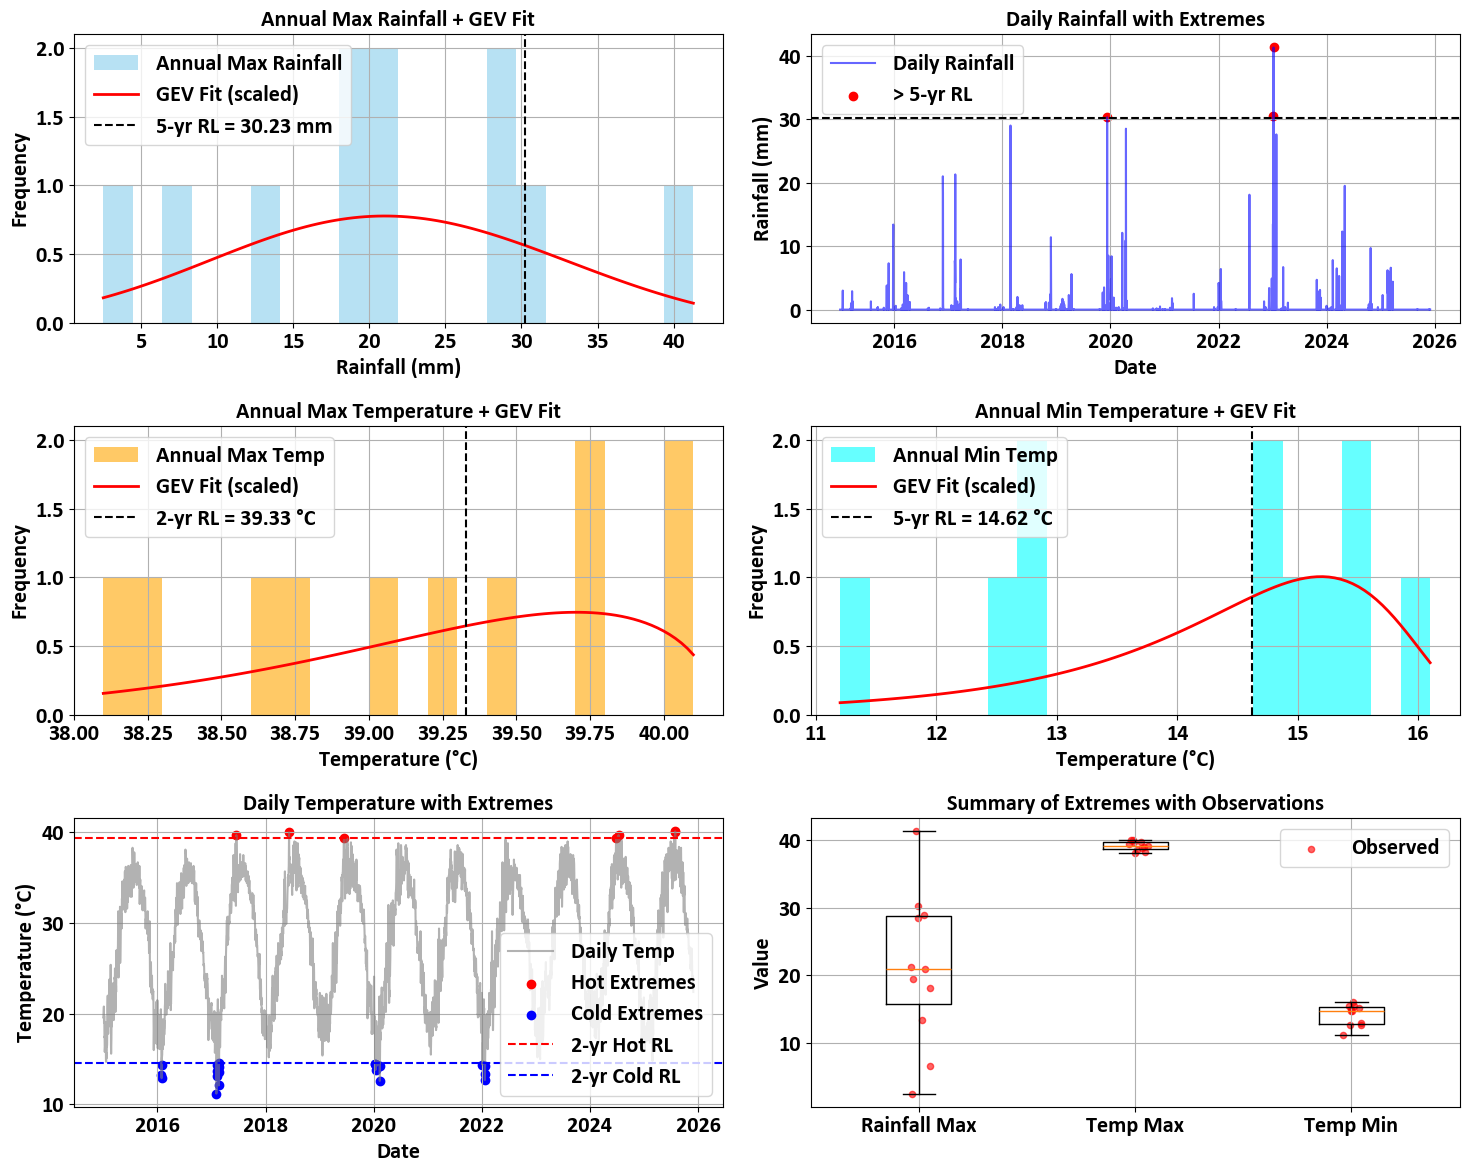

In [22]:
# analysis of observed data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import genextreme as gev



temp = observed["temperature_2m_mean"]
rain = observed["precipitation_sum"]

#----------Rainfall--------------------
# --- 1. Extract annual maxima ---
annual_max = rain.resample("YE").max()
# --- 2. Fit GEV distribution ---
shape, loc, scale = gev.fit(annual_max)
# --- 3. Compute 5-year return level ---
# Return period T = 5 years
T = 5
p = 1 - 1/T                # non-exceedance probability
R5 = gev.ppf(p, shape, loc=loc, scale=scale)
print(f"5-year return level rainfall: {R5:.2f} mm")
# --- 4. Detect extremes based on R5 ---
extreme_rain_anomalies = rain[rain > R5]
# Optional: compute anomaly relative to daily mean
anom_table = pd.DataFrame({
    "Date": extreme_rain_anomalies.index,
    "Rainfall (mm)": extreme_rain_anomalies.values,
})

print("=== Daily Rainfall > 5-year Return Level ===")
print(anom_table.head(100))

#----------temperature--------------------

# ---------- Hot extremes (annual maxima) ----------
annual_max_temp = temp.resample("YE").max()
shape_hot, loc_hot, scale_hot = gev.fit(annual_max_temp)

T2 = 2
p2 = 1 - 1/T2
R2_hot = gev.ppf(p2, shape_hot, loc=loc_hot, scale=scale_hot)
print(f"2-year return level (hot extremes): {R2_hot:.2f} °C")

extreme_hot = temp[temp > R2_hot]
hot_table = pd.DataFrame({
    "Date": extreme_hot.index,
    "Temperature (°C)": extreme_hot.values,
})

print("=== Daily Temperature > 2-year Return Level (Hot Extremes) ===")
print(hot_table.head(100))


# ---------- Cold extremes (annual minima) ----------
annual_min_temp = temp.resample("YE").min()
shape_cold, loc_cold, scale_cold = gev.fit(-annual_min_temp)  # flip sign for minima

R2_cold = -gev.ppf(p2, shape_cold, loc=loc_cold, scale=scale_cold)
print(f"2-year return level (cold extremes): {R2_cold:.2f} °C")

extreme_cold = temp[temp < R2_cold]
cold_table = pd.DataFrame({
    "Date": extreme_cold.index,
    "Temperature (°C)": extreme_cold.values,
})

print("=== Daily Temperature < 2-year Return Level (Cold Extremes) ===")
print(cold_table.head(100))


# Set global font properties
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 16



fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()



# --- Panel 1: Rainfall histogram (frequency) + GEV fit overlay (scaled) ---
axes[0].hist(annual_max, bins=20, density=False, alpha=0.6, color="skyblue", label="Annual Max Rainfall")
x = np.linspace(annual_max.min(), annual_max.max(), 100)
# Scale PDF to counts for overlay: pdf * N * bin_width
bin_width = (annual_max.max() - annual_max.min()) / 20
pdf_scaled = gev.pdf(x, shape, loc=loc, scale=scale) * len(annual_max) * bin_width
axes[0].plot(x, pdf_scaled, "r-", lw=2, label="GEV Fit (scaled)")
axes[0].axvline(R5, color="black", linestyle="--", label=f"5-yr RL = {R5:.2f} mm")
axes[0].set_title("Annual Max Rainfall + GEV Fit",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[0].set_xlabel("Rainfall (mm)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[0].set_ylabel("Frequency",fontdict={'family':'Calibri','size':16,'weight':'bold'})

axes[0].legend()

# --- Panel 2: Rainfall time series ---
axes[1].plot(rain.index, rain, color="blue", alpha=0.6, label="Daily Rainfall")
axes[1].scatter(extreme_rain_anomalies.index, extreme_rain_anomalies, color="red", label="> 5-yr RL")
axes[1].axhline(R5, color="black", linestyle="--")
axes[1].set_title("Daily Rainfall with Extremes",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[1].set_xlabel("Date",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[1].set_ylabel("Rainfall (mm)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[1].legend()

# --- Panel 3: Hot extremes histogram (frequency) ---
axes[2].hist(annual_max_temp, bins=20, density=False, alpha=0.6, color="orange", label="Annual Max Temp")
x = np.linspace(annual_max_temp.min(), annual_max_temp.max(), 100)
bin_width = (annual_max_temp.max() - annual_max_temp.min()) / 20
pdf_scaled = gev.pdf(x, shape_hot, loc=loc_hot, scale=scale_hot) * len(annual_max_temp) * bin_width
axes[2].plot(x, pdf_scaled, "r-", lw=2, label="GEV Fit (scaled)")
axes[2].axvline(R2_hot, color="black", linestyle="--", label=f"2-yr RL = {R2_hot:.2f} °C")
axes[2].set_title("Annual Max Temperature + GEV Fit",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[2].set_xlabel("Temperature (°C)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[2].set_ylabel("Frequency",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[2].legend()

# --- Panel 4: Cold extremes histogram (frequency) ---
axes[3].hist(annual_min_temp, bins=20, density=False, alpha=0.6, color="cyan", label="Annual Min Temp")
x = np.linspace(annual_min_temp.min(), annual_min_temp.max(), 100)
bin_width = (annual_min_temp.max() - annual_min_temp.min()) / 20
pdf_scaled = gev.pdf(-x, shape_cold, loc=loc_cold, scale=scale_cold) * len(annual_min_temp) * bin_width
axes[3].plot(x, pdf_scaled, "r-", lw=2, label="GEV Fit (scaled)")
axes[3].axvline(R2_cold, color="black", linestyle="--", label=f"5-yr RL = {R2_cold:.2f} °C")
axes[3].set_title("Annual Min Temperature + GEV Fit",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[3].set_xlabel("Temperature (°C)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[3].set_ylabel("Frequency",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[3].legend()

# --- Panel 5: Temperature time series ---
plt.grid(True)
axes[4].plot(temp.index, temp, color="gray", alpha=0.6, label="Daily Temp")
axes[4].scatter(extreme_hot.index, extreme_hot, color="red", label="Hot Extremes")
axes[4].scatter(extreme_cold.index, extreme_cold, color="blue", label="Cold Extremes")
axes[4].axhline(R2_hot, color="red", linestyle="--", label=f"2-yr Hot RL")
axes[4].axhline(R2_cold, color="blue", linestyle="--", label=f"2-yr Cold RL")
axes[4].set_title("Daily Temperature with Extremes",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[4].set_xlabel("Date",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[4].set_ylabel("Temperature (°C)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[4].legend()

# --- Panel 6: Summary Boxplot with observed data ---
data = [annual_max, annual_max_temp, annual_min_temp]
labels = ["Rainfall Max", "Temp Max", "Temp Min"]

# Create boxplot
axes[5].boxplot(data, labels=labels)

# Overlay observed data as scatter dots
for i, dataset in enumerate(data, start=1):
    # jitter x positions slightly so dots don't overlap perfectly
    x_positions = np.random.normal(loc=i, scale=0.04, size=len(dataset))
    axes[5].scatter(x_positions, dataset, alpha=0.6, s=20, color="red", label="Observed" if i == 1 else "")

axes[5].set_ylabel("Value", fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[5].set_title("Summary of Extremes with Observations", fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[5].legend()



for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()



Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\bias_corrected\ssp370_tas_NorESM2-MM_bias_corrected.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\bias_corrected\ssp370_pr_NorESM2-MM_bias_corrected.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\bias_corrected\ssp370_tas_MPI-ESM1-2-LR_bias_corrected.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\bias_corrected\ssp370_pr_MPI-ESM1-2-LR_bias_corrected.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\bias_corrected\ssp370_tas_EC-Earth3_bias_corrected.csv
Saved C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\bias_corrected\ssp370_pr_EC-Earth3_bias_corrected.csv

Model performance summary:


,Model,Variable,MAE_cal,RMSE_cal,MAE_val,RMSE_val
0,NorESM2-MM,tas,1.8,2.3,1.9,2.5
1,NorESM2-MM,pr,0.4,2.4,0.4,1.7
2,MPI-ESM1-2-LR,tas,1.8,2.4,1.8,2.3
3,MPI-ESM1-2-LR,pr,0.4,2.3,0.6,3.2
4,EC-Earth3,tas,1.7,2.2,1.9,2.4
5,EC-Earth3,pr,0.4,2.4,0.3,1.6


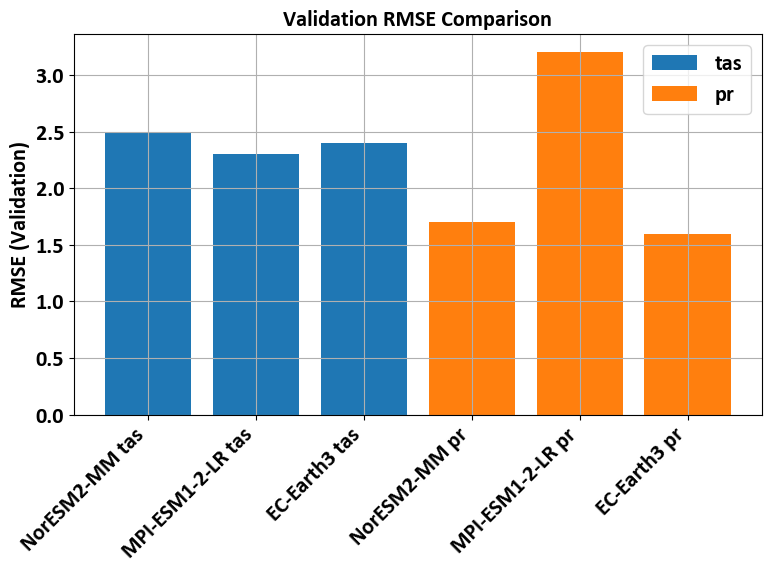

Best model for tas: MPI-ESM1-2-LR (RMSE_val=2.3)
Best model for pr: EC-Earth3 (RMSE_val=1.6)

Prediction data (01-Dec-2025 to 30-Dec-2030):


,tas,pr
2030-12-25,18.6,0.875178
2030-12-26,18.1,1.000000
2030-12-27,19.0,0.000000
2030-12-28,18.6,8.759811
2030-12-29,18.2,0.300000


Prediction data saved to: C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles\bias_corrected\ssp370_bestmodels_prediction_2025-12_to_2030-12.csv


In [30]:
# Bias correction with Quantile Mapping for daily 360-day model data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Paths
# -------------------------------
data_dir = "C:/myfiles/Bootcamp/finalproject/CMIP6/ccfiles"
scenario = "ssp370"
models = ["NorESM2-MM", "MPI-ESM1-2-LR", "EC-Earth3"]
variables = ["tas", "pr"]

# -------------------------------
# Observed data 
# -------------------------------
obs_tas = observed["temperature_2m_mean"]
obs_pr  = observed["precipitation_sum"]

# Calibration and validation windows
train_start = pd.Timestamp("2015-01-01")
train_end   = pd.Timestamp("2023-12-31")
val_start   = pd.Timestamp("2024-01-01")
val_end     = pd.Timestamp("2025-11-30")
pred_start  = pd.Timestamp("2025-12-01")
pred_end    = pd.Timestamp("2030-12-30")

# -------------------------------
# Quantile Mapping functions
# -------------------------------
def qm_fit(ref, sim, n_q=1000):
    qs = np.linspace(0,1,n_q)
    sim_q = np.quantile(sim, qs)
    ref_q = np.quantile(ref, qs)
    return sim_q, ref_q

def qm_apply(sim_series, sim_q, ref_q, var):
    corrected = np.interp(sim_series, sim_q, ref_q)
    if var == "pr":
        corrected = np.clip(corrected, 0, None)
    return pd.Series(corrected, index=sim_series.index)

# -------------------------------
# Metrics
# -------------------------------
def compute_metrics(obs, sim):
    # Align observed to model dates (nearest match)
    obs_aligned = obs.reindex(sim.index, method="nearest")
    mae = np.mean(np.abs(sim - obs_aligned))
    rmse = np.sqrt(np.mean((sim - obs_aligned)**2))
    corr = np.corrcoef(sim, obs_aligned)[0,1] if len(obs_aligned)>1 else np.nan
    return mae, rmse, corr

# -------------------------------
# Process each model and variable
# -------------------------------
results = []
corrected_store = {}  # keep corrected series for later

for model in models:
    for var in variables:
        # Load model CSV
        model_csv = os.path.join(data_dir, f"{scenario}_{var}_{model}.csv")
        df = pd.read_csv(model_csv)
        if "time" in df.columns:
            df["time"] = pd.to_datetime(df["time"])
            df = df.set_index("time")
        else:
            df.index = pd.to_datetime(df.iloc[:,0])
            df = df.iloc[:,1:]
        sim_series = df.squeeze("columns")

        # Calibration/validation split
        sim_cal = sim_series.loc[train_start:train_end]
        sim_val = sim_series.loc[val_start:val_end]

        # Observed reference
        ref_cal = obs_tas.loc[train_start:train_end] if var=="tas" else obs_pr.loc[train_start:train_end]
        ref_val = obs_tas.loc[val_start:val_end] if var=="tas" else obs_pr.loc[val_start:val_end]

        # Fit QM on calibration (align obs to sim dates)
        ref_cal_aligned = ref_cal.reindex(sim_cal.index, method="nearest")
        sim_q, ref_q = qm_fit(ref_cal_aligned.values, sim_cal.values)

        # Apply QM
        corrected_cal = qm_apply(sim_cal, sim_q, ref_q, var)
        corrected_val = qm_apply(sim_val, sim_q, ref_q, var)
        corrected_full = qm_apply(sim_series, sim_q, ref_q, var)

        # Store corrected series
        corrected_store[(model,var)] = corrected_full

        # Compute metrics
        mae_cal, rmse_cal, corr_cal = compute_metrics(ref_cal, corrected_cal)
        mae_val, rmse_val, corr_val = compute_metrics(ref_val, corrected_val)

        results.append({
            "Model": model,
            "Variable": var,
            "MAE_cal": round(mae_cal,1),
            "RMSE_cal": round(rmse_cal,1),
            "MAE_val": round(mae_val,1),
            "RMSE_val": round(rmse_val,1),
            
        })

        # Save corrected full series
        out_dir = os.path.join(data_dir, "bias_corrected")
        os.makedirs(out_dir, exist_ok=True)
        out_csv = os.path.join(out_dir, f"{scenario}_{var}_{model}_bias_corrected.csv")
        corrected_full.to_csv(out_csv, header=[var])
        print(f"Saved {out_csv}")

# -------------------------------
# Summary table
# -------------------------------
results_df = pd.DataFrame(results)
print("\nModel performance summary:")
display(results_df)

# -------------------------------
# Bar chart of RMSE (validation)
# -------------------------------
plt.figure(figsize=(8,6))
for var in variables:
    subset = results_df[results_df["Variable"]==var]
    plt.bar(subset["Model"] + " " + var, subset["RMSE_val"], label=var)
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE (Validation)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.title("Validation RMSE Comparison",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Select best model separately for tas and pr
# -------------------------------
best_models = {}
for var in variables:
    subset = results_df[results_df["Variable"] == var]
    best_row = subset.loc[subset["RMSE_val"].idxmin()]
    best_models[var] = best_row["Model"]
    print(f"Best model for {var}: {best_row['Model']} (RMSE_val={best_row['RMSE_val']})")

# -------------------------------
# Extract prediction data (Dec 2025–Dec 2030) for best models
# -------------------------------
pred_data = {}
for var in variables:
    best_model = best_models[var]
    corrected_series = corrected_store[(best_model, var)]
    pred_data[var] = corrected_series.loc[pred_start:pred_end]

prediction_df = pd.DataFrame(pred_data)
prediction_df.index = prediction_df.index.date   # strip time

# -------------------------------
# Save prediction data to CSV
# -------------------------------
out_dir = os.path.join(data_dir, "bias_corrected")
os.makedirs(out_dir, exist_ok=True)

pred_csv = os.path.join(out_dir, f"{scenario}_bestmodels_prediction_2025-12_to_2030-12.csv")
prediction_df.to_csv(pred_csv, index=True, date_format="%Y-%m-%d")

print("\nPrediction data (01-Dec-2025 to 30-Dec-2030):")
display(prediction_df.tail())
print(f"Prediction data saved to: {pred_csv}")

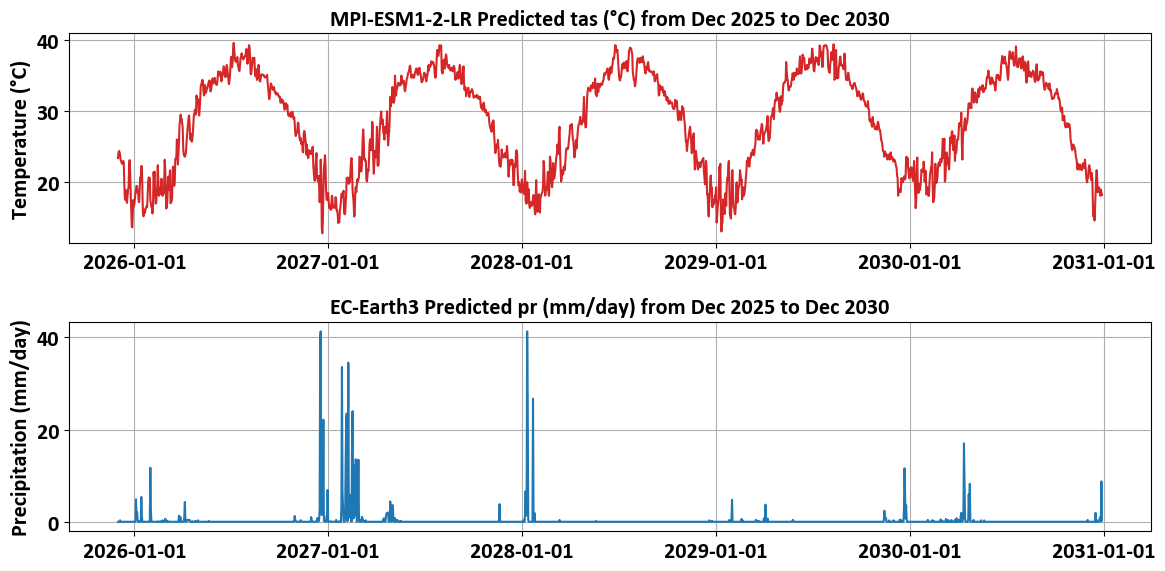

In [27]:
# -------------------------------
# Graphs for predicted data (Dec 2025–Dec 2030)
# -------------------------------

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))

# Plot tas
plt.subplot(2,1,1)
plt.plot(prediction_df.index, prediction_df["tas"], color="tab:red")
plt.title(f"{best_models['tas']} Predicted tas (°C) from Dec 2025 to Dec 2030", fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Temperature (°C)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Plot pr
plt.subplot(2,1,2)
plt.plot(prediction_df.index, prediction_df["pr"], color="tab:blue")
plt.title(f"{best_models['pr']} Predicted pr (mm/day) from Dec 2025 to Dec 2030", fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Precipitation (mm/day)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.tight_layout()
plt.show()

=== Future Rainfall Extremes (Dec 2025–Dec 2030) ===
         Date  Rainfall (mm)
0  2026-12-17      39.908146
1  2026-12-18      41.300000
2  2027-01-27      33.570112
3  2027-02-08      34.501323
4  2028-01-11      41.300000
=== Future Hot Extremes (Dec 2025–Dec 2030) ===
          Date  Temperature (°C)
0   2026-07-07         39.607160
1   2026-08-05         39.288816
2   2026-08-06         38.927668
3   2027-07-30         39.278228
4   2027-08-01         39.178609
5   2027-08-02         39.234766
6   2028-06-25         39.287142
7   2028-06-26         39.154092
8   2028-07-23         38.936919
9   2029-07-15         39.248261
10  2029-07-16         39.071469
11  2029-07-23         39.184607
12  2029-07-24         39.195705
13  2029-07-25         39.261531
14  2029-07-26         39.266068
15  2029-07-27         39.263070
16  2029-07-28         39.194804
17  2029-08-10         39.411035
18  2029-08-11         39.318711
19  2030-07-20         39.111167
=== Future Cold Extremes (Dec 20

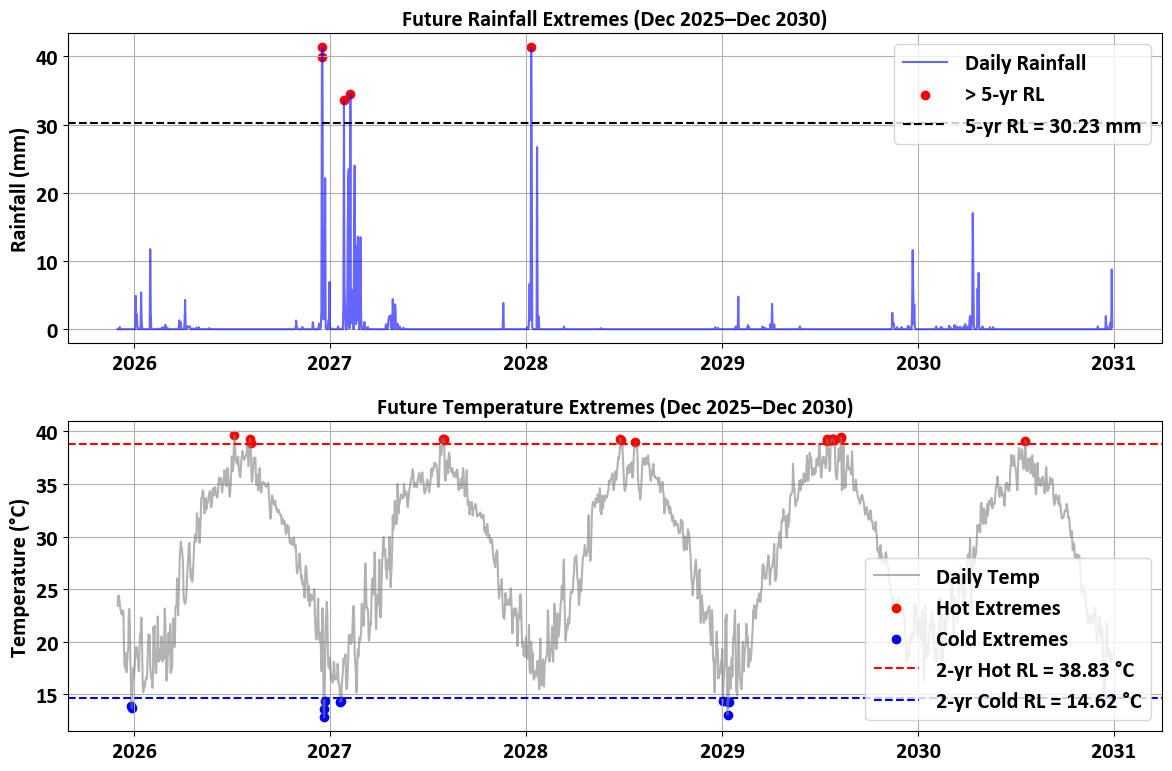

In [31]:
# Assume prediction_df contains future corrected data for tas and pr
# with datetime index from 2025-12-01 to 2030-12-31
# Columns: "tas" (°C), "pr" (mm/day)

# --- Apply thresholds to future data ---
future_rain = prediction_df["pr"]
future_temp = prediction_df["tas"]

# Rainfall extremes above 5-year return level
future_extreme_rain = future_rain[future_rain > R5]
future_rain_table = pd.DataFrame({
    "Date": future_extreme_rain.index,
    "Rainfall (mm)": future_extreme_rain.values
})

# Hot extremes above 2-year return level
future_extreme_hot = future_temp[future_temp > R2_hot-0.5] # to have more extreme data
future_hot_table = pd.DataFrame({
    "Date": future_extreme_hot.index,
    "Temperature (°C)": future_extreme_hot.values
})

# Cold extremes below 2-year return level
future_extreme_cold = future_temp[future_temp < R2_cold]
future_cold_table = pd.DataFrame({
    "Date": future_extreme_cold.index,
    "Temperature (°C)": future_extreme_cold.values
})

print("=== Future Rainfall Extremes (Dec 2025–Dec 2030) ===")
print(future_rain_table.head(100))

print("=== Future Hot Extremes (Dec 2025–Dec 2030) ===")
print(future_hot_table.head(100))

print("=== Future Cold Extremes (Dec 2025–Dec 2030) ===")
print(future_cold_table.head(100))

# --- Plot future extremes ---
fig, axes = plt.subplots(2, 1, figsize=(12,8))

# Rainfall
axes[0].plot(future_rain.index, future_rain, color="blue", alpha=0.6, label="Daily Rainfall")
axes[0].scatter(future_extreme_rain.index, future_extreme_rain, color="red", label="> 5-yr RL")
axes[0].axhline(R5, color="black", linestyle="--", label=f"5-yr RL = {R5:.2f} mm")
axes[0].set_title("Future Rainfall Extremes (Dec 2025–Dec 2030)", fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[0].set_ylabel("Rainfall (mm)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[0].grid()
axes[0].legend()

# Temperature
axes[1].plot(future_temp.index, future_temp, color="gray", alpha=0.6, label="Daily Temp")
axes[1].scatter(future_extreme_hot.index, future_extreme_hot, color="red", label="Hot Extremes")
axes[1].scatter(future_extreme_cold.index, future_extreme_cold, color="blue", label="Cold Extremes")
axes[1].axhline(R2_hot-0.5, color="red", linestyle="--", label=f"2-yr Hot RL = {R2_hot-0.5:.2f} °C")# to have more data
axes[1].axhline(R2_cold, color="blue", linestyle="--", label=f"2-yr Cold RL = {R2_cold:.2f} °C")
axes[1].set_title("Future Temperature Extremes (Dec 2025–Dec 2030)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[1].set_ylabel("Temperature (°C)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18264\3604693119.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  brent = yf.download("BZ=F", start=START, end=END, progress=False)["Close"].dropna()
C:\Users\Dell\AppData\Local\Temp\ipykernel_18264\3604693119.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  natgas = yf.download("NG=F", start=START, end=END, progress=False)["Close"].dropna()


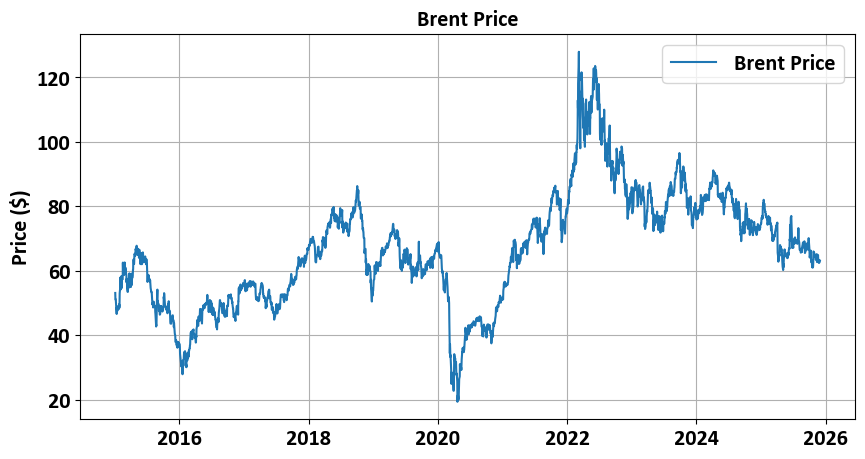

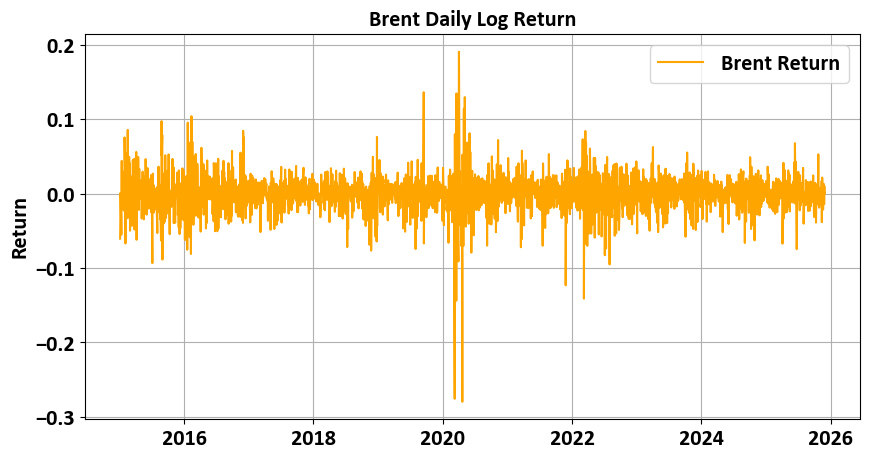

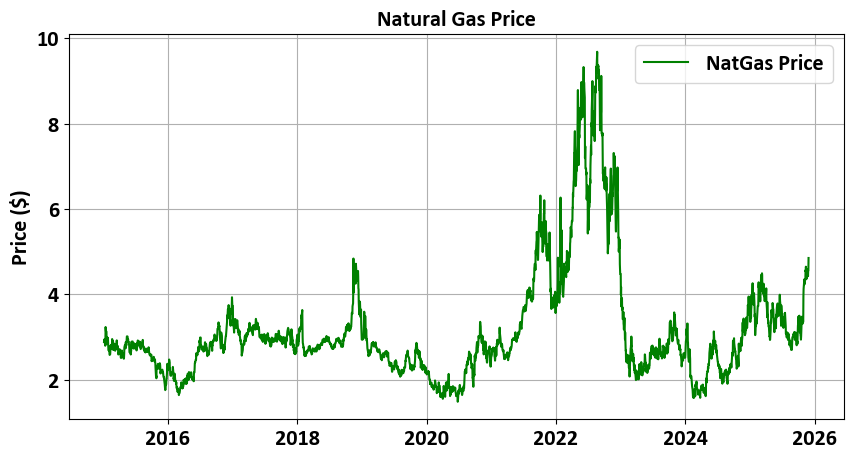

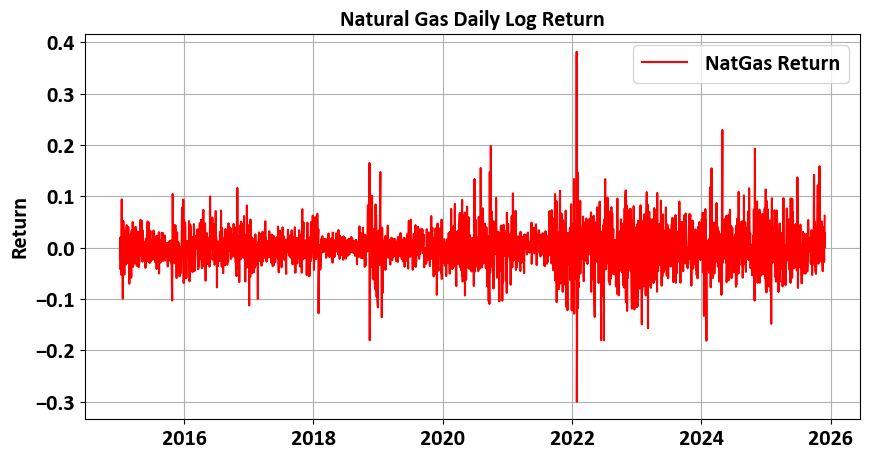

In [32]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
import matplotlib.pyplot as plt

START = "2015-01-01"
END = "2025-11-30"
OUTPUT_DIR = r"C:\myfiles\Bootcamp\finalproject"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Brent
brent = yf.download("BZ=F", start=START, end=END, progress=False)["Close"].dropna()
brent = brent.reindex(pd.date_range(brent.index.min(), brent.index.max(), freq="B")).ffill()
brent_ret = np.log(brent / brent.shift(1))

df_brent = pd.concat([brent, brent_ret], axis=1)
df_brent.columns = ["brent", "brent_ret"]
df_brent = df_brent.dropna()
df_brent.to_csv(os.path.join(OUTPUT_DIR, "brent_daily.csv"))

# NatGas
natgas = yf.download("NG=F", start=START, end=END, progress=False)["Close"].dropna()
natgas = natgas.reindex(pd.date_range(natgas.index.min(), natgas.index.max(), freq="B")).ffill()
natgas_ret = np.log(natgas / natgas.shift(1))

df_natgas = pd.concat([natgas, natgas_ret], axis=1)
df_natgas.columns = ["natgas", "natgas_ret"]
df_natgas = df_natgas.dropna()
df_natgas.to_csv(os.path.join(OUTPUT_DIR, "natgas_daily.csv"))

# Plotting
#plt.style.use("seaborn-v0_8-whitegrid")

# Brent Price
plt.figure(figsize=(10,5))
plt.plot(df_brent.index, df_brent["brent"], label="Brent Price")
plt.title("Brent Price",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Price ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.legend()
#plt.savefig(os.path.join(OUTPUT_DIR, "brent_price.png"), dpi=300)
plt.grid(True)
plt.show()

# Brent Return
plt.figure(figsize=(10,5))
plt.plot(df_brent.index, df_brent["brent_ret"], label="Brent Return", color="orange")
plt.title("Brent Daily Log Return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.legend()
#plt.savefig(os.path.join(OUTPUT_DIR, "brent_return.png"), dpi=300)
plt.grid(True)
plt.show()

# NatGas Price
plt.figure(figsize=(10,5))
plt.plot(df_natgas.index, df_natgas["natgas"], label="NatGas Price", color="green")
plt.title("Natural Gas Price",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Price ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.legend()
#plt.savefig(os.path.join(OUTPUT_DIR, "natgas_price.png"), dpi=300)
plt.grid(True)
plt.show()

# NatGas Return
plt.figure(figsize=(10,5))
plt.plot(df_natgas.index, df_natgas["natgas_ret"], label="NatGas Return", color="red")
plt.title("Natural Gas Daily Log Return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.legend()
#plt.savefig(os.path.join(OUTPUT_DIR, "natgas_return.png"), dpi=300)
plt.grid(True)
plt.show()


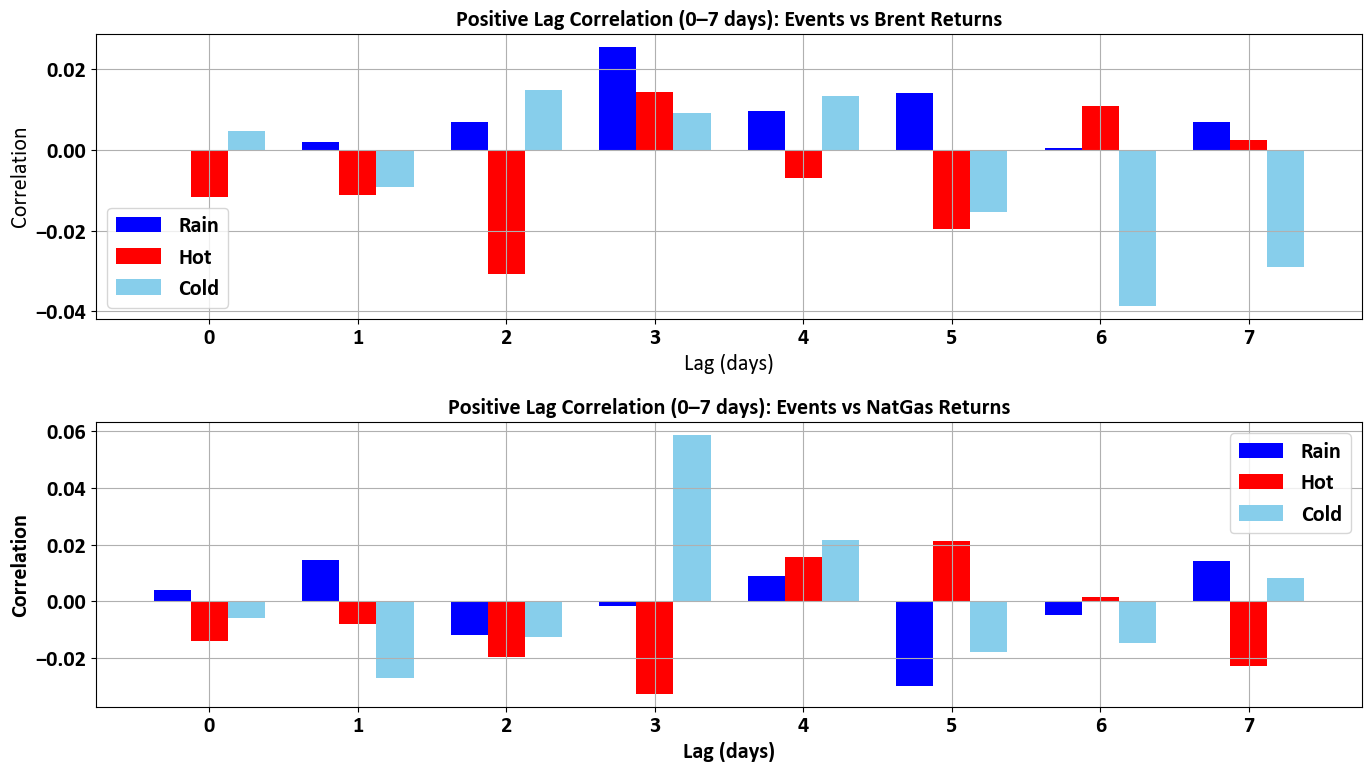

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load Brent & NatGas CSVs
# -----------------------------
brent = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\brent_daily.csv")
natgas = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\natgas_daily.csv")

# Fix header issue: first column is blank -> rename to "Date"
brent.rename(columns={brent.columns[0]: "Date"}, inplace=True)
natgas.rename(columns={natgas.columns[0]: "Date"}, inplace=True)

# Parse Date and set as index
brent["Date"] = pd.to_datetime(brent["Date"])
natgas["Date"] = pd.to_datetime(natgas["Date"])
brent.set_index("Date", inplace=True)
natgas.set_index("Date", inplace=True)

# -----------------------------
# Build event dates
# -----------------------------
rain_dates = pd.to_datetime(["2019-12-10","2023-01-06","2023-01-07"])
hot_dates  = pd.to_datetime(["2017-06-18","2018-06-09","2019-06-17",
                             "2024-06-26","2024-07-13","2025-07-30","2025-07-31"])
cold_dates = pd.to_datetime([
    "2016-01-29","2016-01-30","2016-01-31","2017-02-03","2017-02-04","2017-02-05","2017-02-06",
    "2017-02-18","2017-02-19","2017-02-20","2017-02-21","2020-01-12","2020-01-13","2020-01-14",
    "2020-01-26","2020-02-12","2020-02-13","2022-01-05","2022-01-21","2022-01-22","2022-01-23"
])

# -----------------------------
# Build indicators safely (snap to nearest trading day)
# -----------------------------
def make_indicator(event_dates, index):
    indicator = pd.Series(0, index=index)
    for d in event_dates:
        if d in indicator.index:
            indicator.loc[d] = 1
        else:
            nearest = indicator.index.get_indexer([d], method="nearest")[0]
            indicator.iloc[nearest] = 1
    return indicator

rain_indicator = make_indicator(rain_dates, brent.index)
hot_indicator  = make_indicator(hot_dates, brent.index)
cold_indicator = make_indicator(cold_dates, brent.index)

# -----------------------------
# Cross-correlation with 7 days lags only
# -----------------------------
max_lag = 7  
lags = range(0, max_lag+1)

def lagged_corr(ret_series, indicator):
    return [ret_series.corr(indicator.shift(lag)) for lag in lags]

corr_rain_brent = lagged_corr(brent["brent_ret"], rain_indicator)
corr_hot_brent  = lagged_corr(brent["brent_ret"], hot_indicator)
corr_cold_brent = lagged_corr(brent["brent_ret"], cold_indicator)

corr_rain_natgas = lagged_corr(natgas["natgas_ret"], rain_indicator)
corr_hot_natgas  = lagged_corr(natgas["natgas_ret"], hot_indicator)
corr_cold_natgas = lagged_corr(natgas["natgas_ret"], cold_indicator)

# -----------------------------
# Plot bar charts
# -----------------------------
plt.figure(figsize=(14,8))

# Brent
plt.subplot(2,1,1)
bar_width = 0.25
x = np.arange(len(lags))
plt.bar(x - bar_width, corr_rain_brent, width=bar_width, label="Rain",color="blue")
plt.bar(x, corr_hot_brent, width=bar_width, label="Hot",color="red")
plt.bar(x + bar_width, corr_cold_brent, width=bar_width, label="Cold",color="skyblue")
plt.xticks(x, lags)
plt.title("Positive Lag Correlation (0–7 days): Events vs Brent Returns",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()

# NatGas
plt.subplot(2,1,2)
plt.bar(x - bar_width, corr_rain_natgas, width=bar_width, label="Rain",color="blue")
plt.bar(x, corr_hot_natgas, width=bar_width, label="Hot",color="red")
plt.bar(x + bar_width, corr_cold_natgas, width=bar_width, label="Cold",color="skyblue")
plt.xticks(x, lags)
plt.title("Positive Lag Correlation (0–7 days): Events vs NatGas Returns",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.xlabel("Lag (days)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Correlation",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

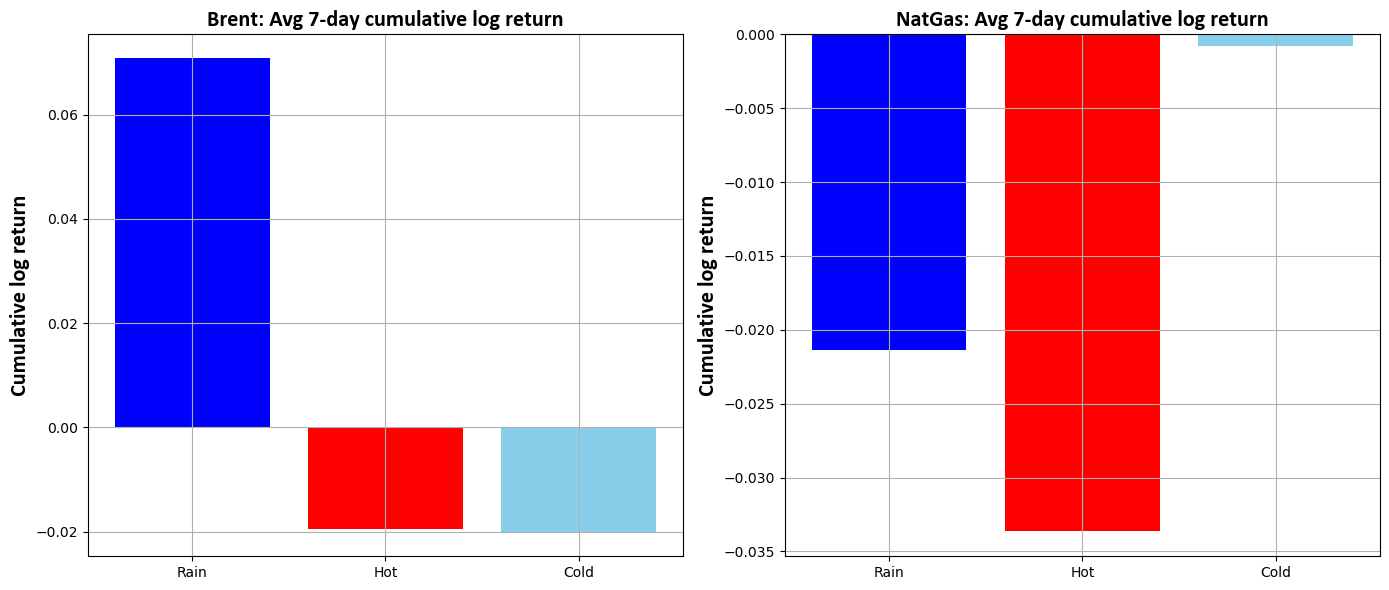

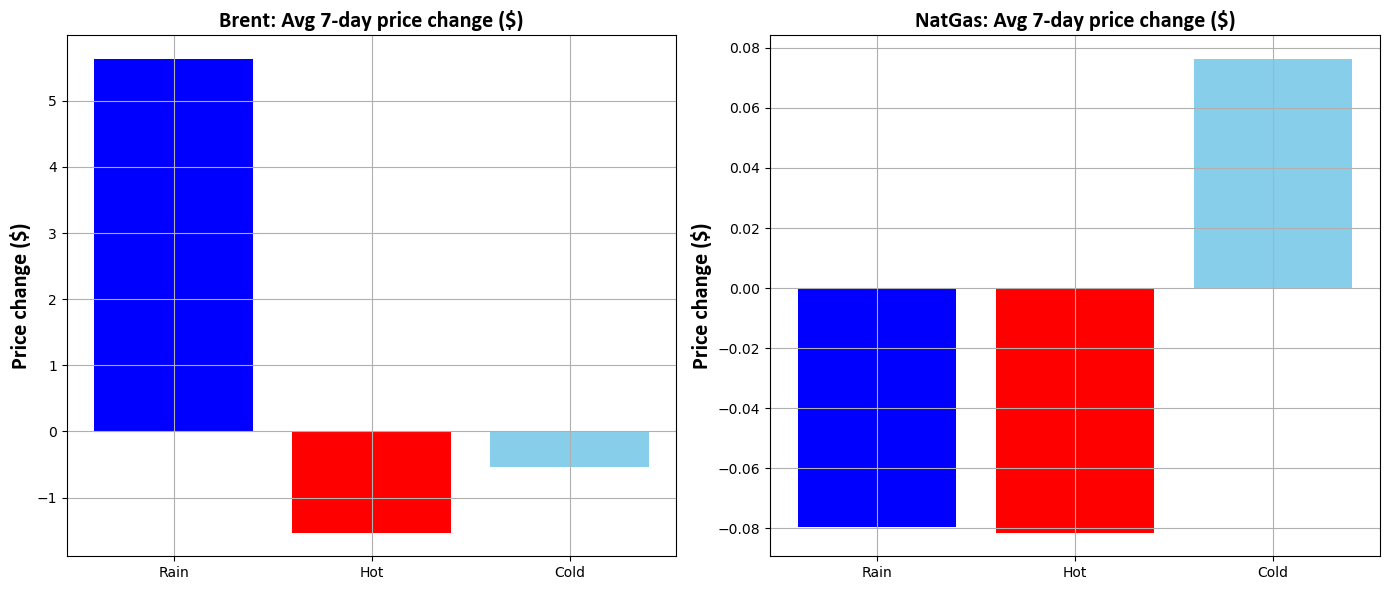

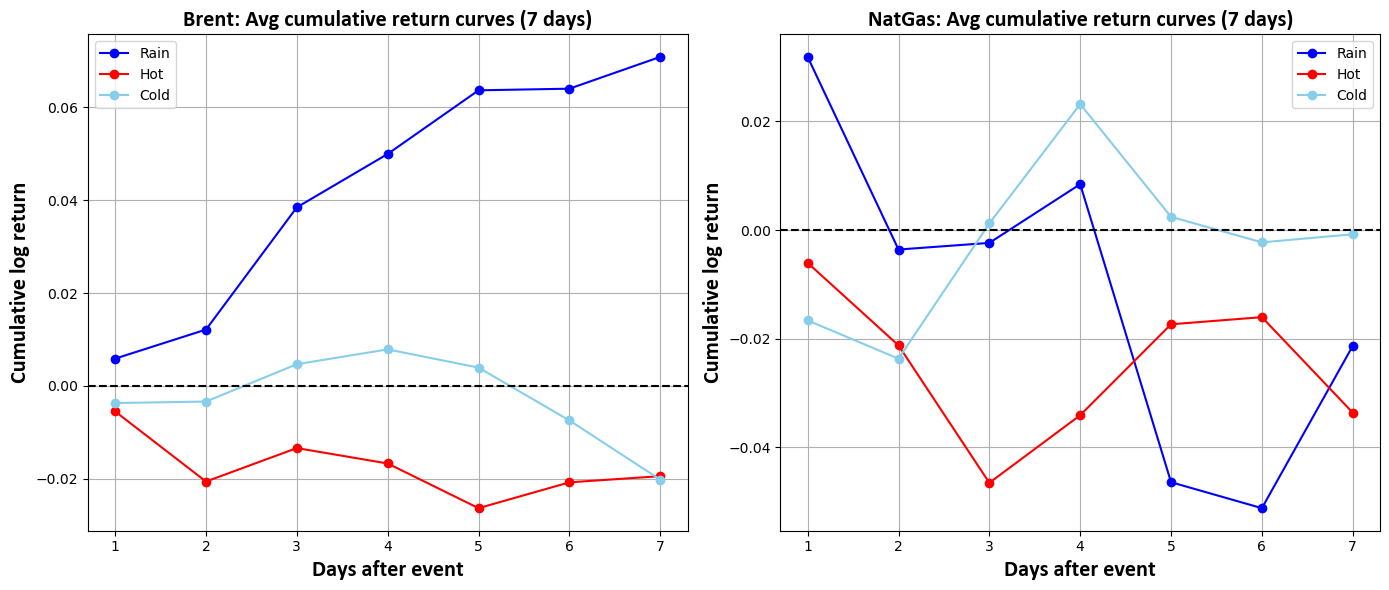

Brent 7-day averages:
 Rain: return = 0.07082505058272325 , price change = 5.633333841959636
 Hot:  return = -0.019429487380227872 , price change = -1.5299993242536263
 Cold: return = -0.020178033614244122 , price change = -0.5395237150646395

NatGas 7-day averages:
 Rain: return = -0.02134054341918933 , price change = -0.07966669400533055
 Hot:  return = -0.033644833143637476 , price change = -0.08142859595162515
 Cold: return = -0.0007808921642692424 , price change = 0.07628569148835672


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load Brent & NatGas CSVs
# -----------------------------
brent = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\brent_daily.csv")
natgas = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\natgas_daily.csv")

# Fix header issue: first column is blank -> rename to "Date"
brent.rename(columns={brent.columns[0]: "Date"}, inplace=True)
natgas.rename(columns={natgas.columns[0]: "Date"}, inplace=True)

# Parse Date and set as index
brent["Date"] = pd.to_datetime(brent["Date"])
natgas["Date"] = pd.to_datetime(natgas["Date"])
brent.set_index("Date", inplace=True)
natgas.set_index("Date", inplace=True)

# -----------------------------
# Event dates
# -----------------------------
rain_dates = pd.to_datetime(["2019-12-10","2023-01-06","2023-01-07"])
hot_dates  = pd.to_datetime(["2017-06-18","2018-06-09","2019-06-17",
                             "2024-06-26","2024-07-13","2025-07-30","2025-07-31"])
cold_dates = pd.to_datetime([
    "2016-01-29","2016-01-30","2016-01-31","2017-02-03","2017-02-04","2017-02-05","2017-02-06",
    "2017-02-18","2017-02-19","2017-02-20","2017-02-21","2020-01-12","2020-01-13","2020-01-14",
    "2020-01-26","2020-02-12","2020-02-13","2022-01-05","2022-01-21","2022-01-22","2022-01-23"
])

# -----------------------------
# Event study functions
# -----------------------------
def avg_cum_return_and_price(ret_series, price_series, event_dates, window=7):
    cum_returns = []
    cum_price_changes = []
    for d in event_dates:
        # snap to nearest trading day
        if d in ret_series.index:
            start = d
        else:
            nearest = ret_series.index.get_indexer([d], method="nearest")[0]
            start = ret_series.index[nearest]
        # next 'window' days
        window_returns = ret_series.loc[start:].iloc[1:window+1]
        cum_ret = window_returns.sum()  # cumulative log return
        cum_returns.append(cum_ret)
        # translate log return into price change
        start_price = price_series.loc[start]
        end_price = price_series.loc[start:].iloc[window]
        cum_price_changes.append(end_price - start_price)
    return np.mean(cum_returns), np.mean(cum_price_changes)

def avg_cum_curve(ret_series, event_dates, window=7):
    curves = []
    for d in event_dates:
        if d in ret_series.index:
            start = d
        else:
            nearest = ret_series.index.get_indexer([d], method="nearest")[0]
            start = ret_series.index[nearest]
        window_returns = ret_series.loc[start:].iloc[1:window+1]
        curves.append(window_returns.cumsum().values)
    return np.mean(curves, axis=0)

# -----------------------------
# Compute averages
# -----------------------------
brent_rain_ret, brent_rain_price = avg_cum_return_and_price(brent["brent_ret"], brent["brent"], rain_dates)
brent_hot_ret,  brent_hot_price  = avg_cum_return_and_price(brent["brent_ret"], brent["brent"], hot_dates)
brent_cold_ret, brent_cold_price = avg_cum_return_and_price(brent["brent_ret"], brent["brent"], cold_dates)

natgas_rain_ret, natgas_rain_price = avg_cum_return_and_price(natgas["natgas_ret"], natgas["natgas"], rain_dates)
natgas_hot_ret,  natgas_hot_price  = avg_cum_return_and_price(natgas["natgas_ret"], natgas["natgas"], hot_dates)
natgas_cold_ret, natgas_cold_price = avg_cum_return_and_price(natgas["natgas_ret"], natgas["natgas"], cold_dates)

# -----------------------------
# Plot bar charts (summary)
# -----------------------------
labels = ["Rain", "Hot", "Cold"]

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.bar(labels, [brent_rain_ret, brent_hot_ret, brent_cold_ret], color=["blue","red","skyblue"])
plt.title("Brent: Avg 7-day cumulative log return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Cumulative log return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.grid(True)

plt.subplot(1,2,2)
plt.bar(labels, [natgas_rain_ret, natgas_hot_ret, natgas_cold_ret], color=["blue","red","skyblue"])
plt.title("NatGas: Avg 7-day cumulative log return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Cumulative log return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.bar(labels, [brent_rain_price, brent_hot_price, brent_cold_price], color=["blue","red","skyblue"])
plt.title("Brent: Avg 7-day price change ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Price change ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.grid(True)

plt.subplot(1,2,2)
plt.bar(labels, [natgas_rain_price, natgas_hot_price, natgas_cold_price], color=["blue","red","skyblue"])
plt.title("NatGas: Avg 7-day price change ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Price change ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.tight_layout()
plt.grid(True)
plt.show()

# -----------------------------
# Plot cumulative return curves
# -----------------------------
days = range(1,8)
brent_rain_curve = avg_cum_curve(brent["brent_ret"], rain_dates, window=7)
brent_hot_curve  = avg_cum_curve(brent["brent_ret"], hot_dates, window=7)
brent_cold_curve = avg_cum_curve(brent["brent_ret"], cold_dates, window=7)

natgas_rain_curve = avg_cum_curve(natgas["natgas_ret"], rain_dates, window=7)
natgas_hot_curve  = avg_cum_curve(natgas["natgas_ret"], hot_dates, window=7)
natgas_cold_curve = avg_cum_curve(natgas["natgas_ret"], cold_dates, window=7)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(days, brent_rain_curve, marker="o", label="Rain",color="blue")
plt.plot(days, brent_hot_curve, marker="o", label="Hot",color="red")
plt.plot(days, brent_cold_curve, marker="o", label="Cold",color="skyblue")
plt.axhline(0, color="black", linestyle="--")
plt.title("Brent: Avg cumulative return curves (7 days)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.xlabel("Days after event",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Cumulative log return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(days, natgas_rain_curve, marker="o", label="Rain",color="blue")
plt.plot(days, natgas_hot_curve, marker="o", label="Hot",color="red")
plt.plot(days, natgas_cold_curve, marker="o", label="Cold",color="skyblue")
plt.axhline(0, color="black", linestyle="--")
plt.title("NatGas: Avg cumulative return curves (7 days)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.xlabel("Days after event",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.ylabel("Cumulative log return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# -----------------------------
# Print numeric results
# -----------------------------
print("Brent 7-day averages:")
print(" Rain: return =", brent_rain_ret, ", price change =", brent_rain_price)
print(" Hot:  return =", brent_hot_ret,  ", price change =", brent_hot_price)
print(" Cold: return =", brent_cold_ret, ", price change =", brent_cold_price)

print("\nNatGas 7-day averages:")
print(" Rain: return =", natgas_rain_ret, ", price change =", natgas_rain_price)
print(" Hot:  return =", natgas_hot_ret,  ", price change =", natgas_hot_price)
print(" Cold: return =", natgas_cold_ret, ", price change =", natgas_cold_price)

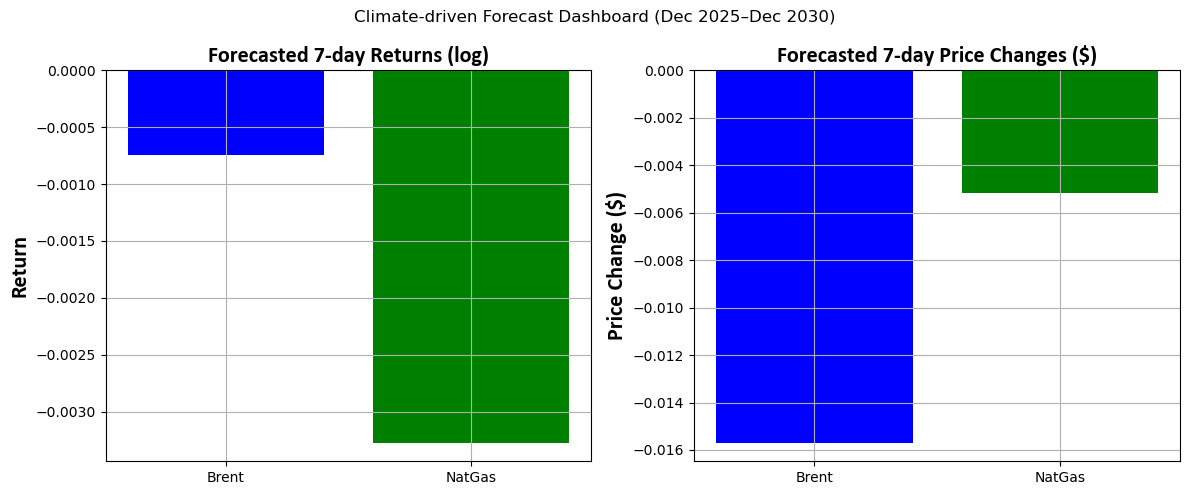

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Future climate extremes ===
rain_dates = pd.to_datetime([
    "2026-12-17", "2026-12-18", "2027-01-18", "2027-01-27",
    "2028-01-08", "2028-01-11"
])
hot_dates = pd.to_datetime([
    "2026-07-07", "2026-07-08", "2026-07-09", "2026-08-06",
    "2027-07-30", "2027-08-01", "2027-08-02",
    "2028-06-25", "2028-07-24", "2028-07-25",
    "2029-07-15", "2029-07-16", "2029-07-23", "2029-07-24",
    "2029-07-25", "2029-07-26", "2029-07-27", "2029-07-28",
    "2029-08-10", "2029-08-11", "2030-07-20"
])
cold_dates = pd.to_datetime([
    "2025-12-27", "2025-12-28", "2026-12-20", "2026-12-21", "2026-12-22",
    "2027-01-12", "2027-01-22", "2028-01-10",
    "2029-01-11", "2029-01-12", "2029-01-13"
])

# === Weekly frequency estimates ===
total_weeks = 5 * 52
rain_freq = len(rain_dates) / total_weeks #6/5*52 R
hot_freq = len(hot_dates) / total_weeks  #21/5*52 H
cold_freq = len(cold_dates) / total_weeks #11/5*52 C

# === 7-day impact coefficients ===
brent_ret_coef = [0.071, -0.019, -0.020]
brent_price_coef = [5.63, -1.52, -0.54]
natgas_ret_coef = [-0.021, -0.034, -0.001]
natgas_price_coef = [-0.080, -0.081, 0.076]
# Example : Delta (return Brent)= 0.071 R -0.019 H - 0.020 C
# === Forecast calculation ===
R, H, C = rain_freq, hot_freq, cold_freq
brent_ret = brent_ret_coef[0]*R + brent_ret_coef[1]*H + brent_ret_coef[2]*C
brent_price = brent_price_coef[0]*R + brent_price_coef[1]*H + brent_price_coef[2]*C
natgas_ret = natgas_ret_coef[0]*R + natgas_ret_coef[1]*H + natgas_ret_coef[2]*C
natgas_price = natgas_price_coef[0]*R + natgas_price_coef[1]*H + natgas_price_coef[2]*C

# === Plot forecast dashboard ===
fig, axes = plt.subplots(1,2, figsize=(12,5))
commodities = ["Brent", "NatGas"]
returns = [brent_ret, natgas_ret]
prices = [brent_price, natgas_price]

axes[0].bar(commodities, returns, color=["blue","green"])
axes[0].set_title("Forecasted 7-day Returns (log)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[0].set_ylabel("Return",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[0].grid(True)

axes[1].bar(commodities, prices, color=["blue","green"])
axes[1].set_title("Forecasted 7-day Price Changes ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[1].set_ylabel("Price Change ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
axes[1].grid(True)
plt.suptitle("Climate-driven Forecast Dashboard (Dec 2025–Dec 2030)")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

brent = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\brent_daily.csv")
natgas = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\natgas_daily.csv")

# Fix header issue: first column is blank -> rename to "Date"
brent.rename(columns={brent.columns[0]: "Date"}, inplace=True)
natgas.rename(columns={natgas.columns[0]: "Date"}, inplace=True)


# Parse dates
brent["Date"] = pd.to_datetime(brent["Date"])
natgas["Date"] = pd.to_datetime(natgas["Date"])

# Get last available prices
brent_last_price = brent["brent"].iloc[-1]
natgas_last_price = natgas["natgas"].iloc[-1]

# Weekly event frequencies (from climate projections)
R, H, C = 0.02, 0.08, 0.04

# Coefficients for 7-day impacts
brent_price_coef = [5.63, -1.52, -0.54]
natgas_price_coef =  [-0.080, -0.081, 0.076]

# Forecasted price changes
brent_price_change = brent_price_coef[0]*R + brent_price_coef[1]*H + brent_price_coef[2]*C
natgas_price_change = natgas_price_coef[0]*R + natgas_price_coef[1]*H + natgas_price_coef[2]*C

# Forecasted prices
brent_forecast_price = brent_last_price + brent_price_change
natgas_forecast_price = natgas_last_price + natgas_price_change

print("Current Brent price:", brent_last_price)
print("Forecasted Brent price in 7 days:", brent_forecast_price)

print("Current NatGas price:", natgas_last_price)
print("Forecasted NatGas price in 7 days:", natgas_forecast_price)

Current Brent price: 63.20000076293945
Forecasted Brent price in 7 days: 63.16940076293945
Current NatGas price: 4.849999904632568
Forecasted NatGas price in 7 days: 4.844959904632568


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load current baseline prices from your CSVs ===
brent = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\brent_daily.csv")
natgas = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\natgas_daily.csv")

# Fix header issue: first column is blank -> rename to "Date"
brent.rename(columns={brent.columns[0]: "Date"}, inplace=True)
natgas.rename(columns={natgas.columns[0]: "Date"}, inplace=True)

brent["Date"] = pd.to_datetime(brent["Date"])
natgas["Date"] = pd.to_datetime(natgas["Date"])

brent_last_price = brent["brent"].iloc[-1]
natgas_last_price = natgas["natgas"].iloc[-1]

# === Future climate event dates ===
rain_dates = pd.to_datetime([
    "2026-12-17","2026-12-18","2027-01-18","2027-01-27",
    "2028-01-08","2028-01-11"
])
hot_dates = pd.to_datetime([
    "2026-07-07","2026-07-08","2026-07-09","2026-08-06",
    "2027-07-30","2027-08-01","2027-08-02",
    "2028-06-25","2028-07-24","2028-07-25",
    "2029-07-15","2029-07-16","2029-07-23","2029-07-24",
    "2029-07-25","2029-07-26","2029-07-27","2029-07-28",
    "2029-08-10","2029-08-11","2030-07-20"
])
cold_dates = pd.to_datetime([
    "2025-12-27","2025-12-28","2026-12-20","2026-12-21","2026-12-22",
    "2027-01-12","2027-01-22","2028-01-10",
    "2029-01-11","2029-01-12","2029-01-13"
])

# === Event impact coefficients (7-day price change) ===
brent_impacts = {"Rain": 5.63, "Hot": -1.52, "Cold": -0.54}
natgas_impacts = {"Rain": -0.080, "Hot": -0.081, "Cold": 0.076}

# === Build event timeline ===
events = []
for d in rain_dates:
    events.append({"Date": d, "Type": "Rain"})
for d in hot_dates:
    events.append({"Date": d, "Type": "Hot"})
for d in cold_dates:
    events.append({"Date": d, "Type": "Cold"})

events_df = pd.DataFrame(events).sort_values("Date").reset_index(drop=True)

# === Simulate price changes sequentially ===
brent_price = brent_last_price
natgas_price = natgas_last_price

brent_prices = []
natgas_prices = []

for _, row in events_df.iterrows():
    event_type = row["Type"]
    # Apply event impact
    brent_price += brent_impacts[event_type]
    natgas_price += natgas_impacts[event_type]
    brent_prices.append(brent_price)
    natgas_prices.append(natgas_price)

events_df["Brent_Price"] = brent_prices
events_df["NatGas_Price"] = natgas_prices

print(events_df.head(100))  


         Date  Type  Brent_Price  NatGas_Price
0  2025-12-27  Cold    62.660001         4.926
1  2025-12-28  Cold    62.120001         5.002
2  2026-07-07   Hot    60.600001         4.921
3  2026-07-08   Hot    59.080001         4.840
4  2026-07-09   Hot    57.560001         4.759
5  2026-08-06   Hot    56.040001         4.678
6  2026-12-17  Rain    61.670001         4.598
7  2026-12-18  Rain    67.300001         4.518
8  2026-12-20  Cold    66.760001         4.594
9  2026-12-21  Cold    66.220001         4.670
10 2026-12-22  Cold    65.680001         4.746
11 2027-01-12  Cold    65.140001         4.822
12 2027-01-18  Rain    70.770001         4.742
13 2027-01-22  Cold    70.230001         4.818
14 2027-01-27  Rain    75.860001         4.738
15 2027-07-30   Hot    74.340001         4.657
16 2027-08-01   Hot    72.820001         4.576
17 2027-08-02   Hot    71.300001         4.495
18 2028-01-08  Rain    76.930001         4.415
19 2028-01-10  Cold    76.390001         4.491
20 2028-01-11

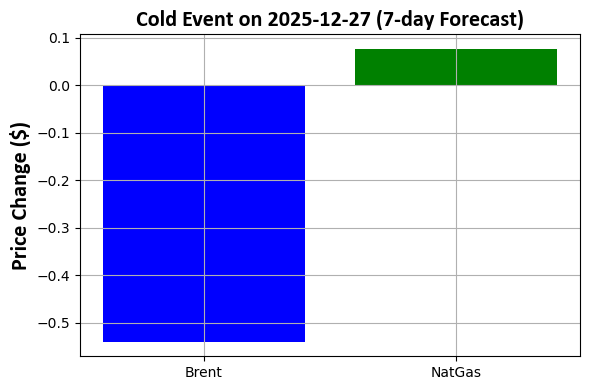

Cold Event on 2025-12-27
  Brent start=62.66, forecast=62.12, return=-0.020
  NatGas start=4.93, forecast=5.00, return=-0.001
--------------------------------------------------


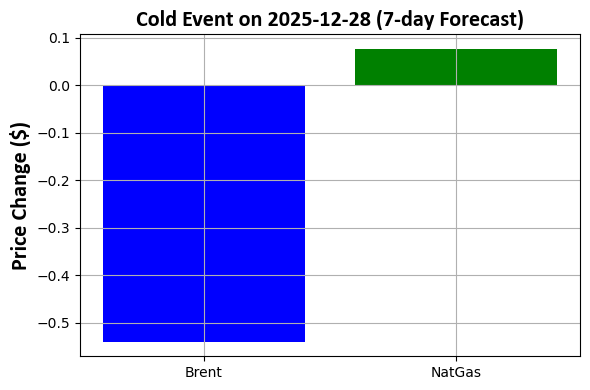

Cold Event on 2025-12-28
  Brent start=62.12, forecast=61.58, return=-0.020
  NatGas start=5.00, forecast=5.08, return=-0.001
--------------------------------------------------


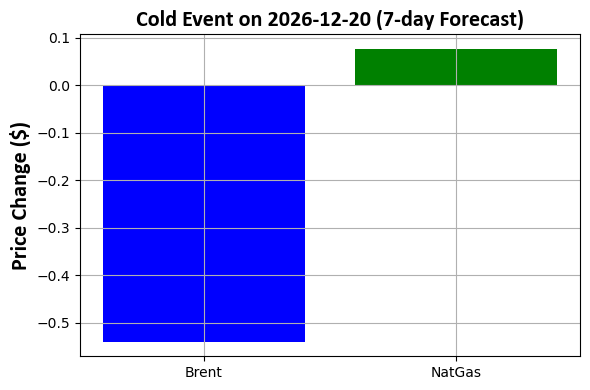

Cold Event on 2026-12-20
  Brent start=66.76, forecast=66.22, return=-0.020
  NatGas start=4.59, forecast=4.67, return=-0.001
--------------------------------------------------


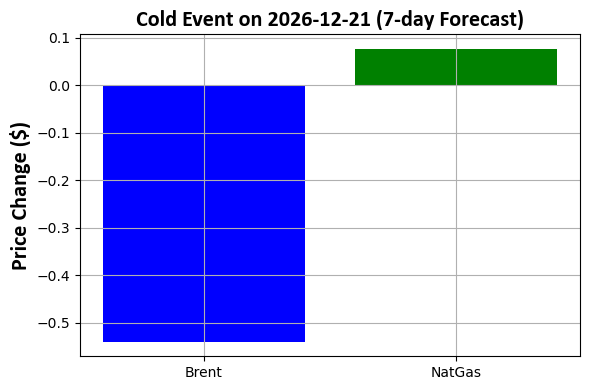

Cold Event on 2026-12-21
  Brent start=66.22, forecast=65.68, return=-0.020
  NatGas start=4.67, forecast=4.75, return=-0.001
--------------------------------------------------


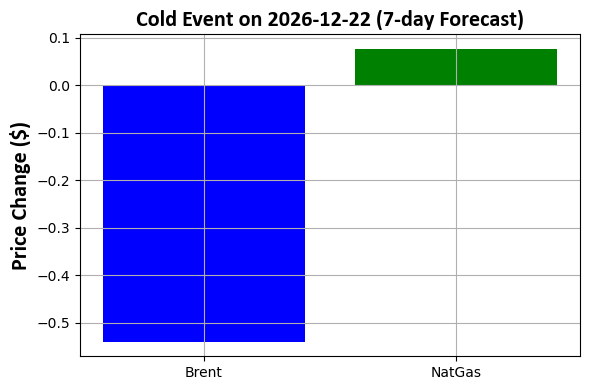

Cold Event on 2026-12-22
  Brent start=65.68, forecast=65.14, return=-0.020
  NatGas start=4.75, forecast=4.82, return=-0.001
--------------------------------------------------


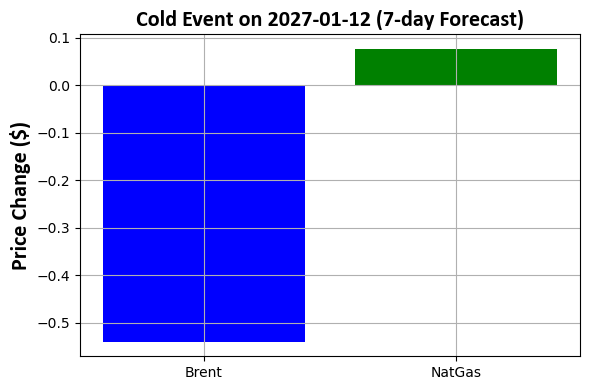

Cold Event on 2027-01-12
  Brent start=65.14, forecast=64.60, return=-0.020
  NatGas start=4.82, forecast=4.90, return=-0.001
--------------------------------------------------


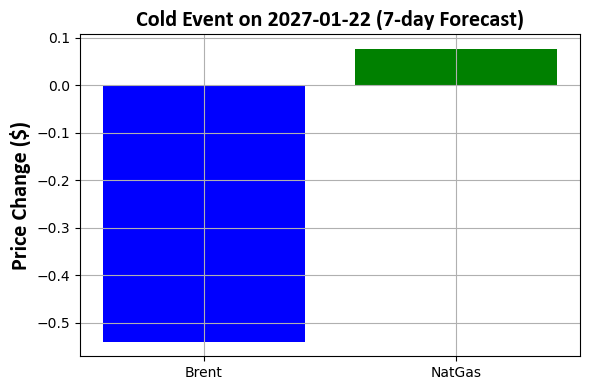

Cold Event on 2027-01-22
  Brent start=70.23, forecast=69.69, return=-0.020
  NatGas start=4.82, forecast=4.89, return=-0.001
--------------------------------------------------


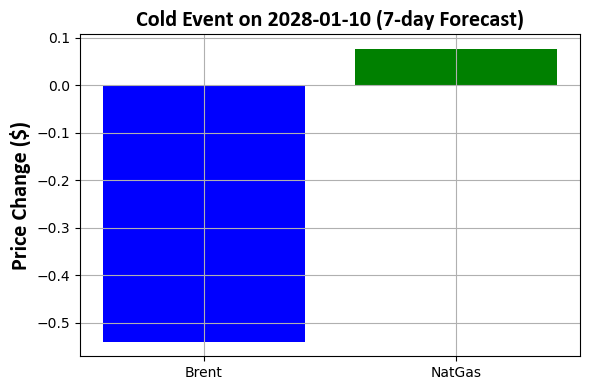

Cold Event on 2028-01-10
  Brent start=76.39, forecast=75.85, return=-0.020
  NatGas start=4.49, forecast=4.57, return=-0.001
--------------------------------------------------


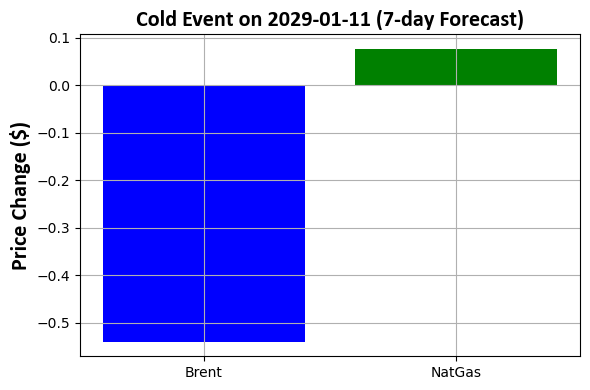

Cold Event on 2029-01-11
  Brent start=76.92, forecast=76.38, return=-0.020
  NatGas start=4.24, forecast=4.32, return=-0.001
--------------------------------------------------


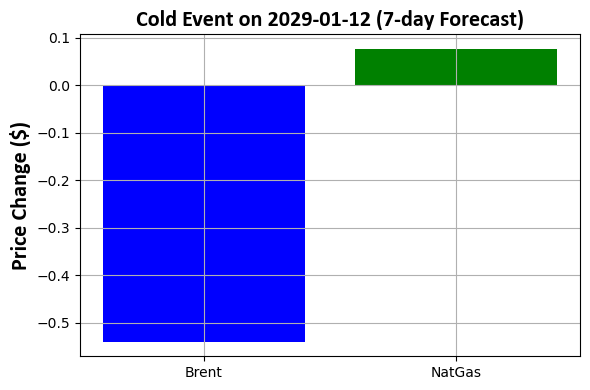

Cold Event on 2029-01-12
  Brent start=76.38, forecast=75.84, return=-0.020
  NatGas start=4.32, forecast=4.40, return=-0.001
--------------------------------------------------


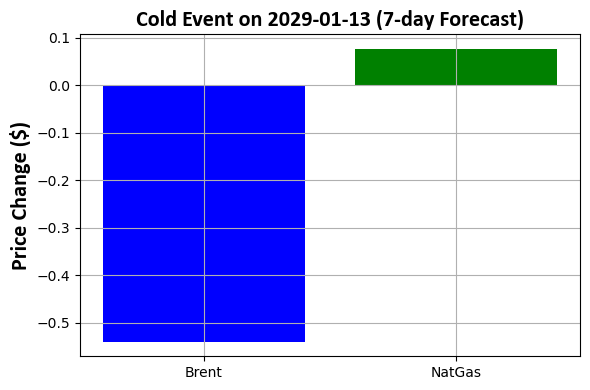

Cold Event on 2029-01-13
  Brent start=75.84, forecast=75.30, return=-0.020
  NatGas start=4.40, forecast=4.47, return=-0.001
--------------------------------------------------


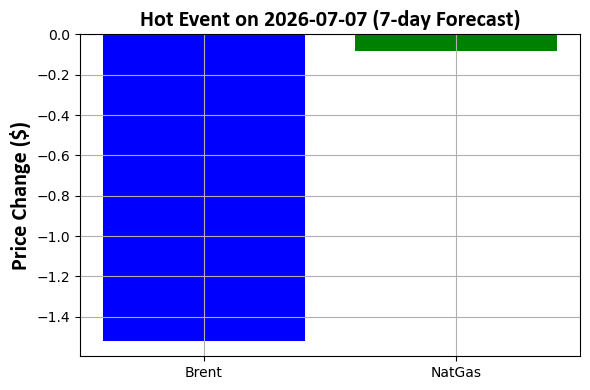

Hot Event on 2026-07-07
  Brent start=60.60, forecast=59.08, return=-0.019
  NatGas start=4.92, forecast=4.84, return=-0.034
--------------------------------------------------


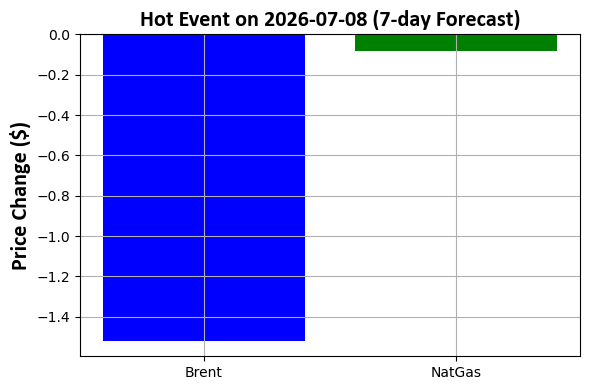

Hot Event on 2026-07-08
  Brent start=59.08, forecast=57.56, return=-0.019
  NatGas start=4.84, forecast=4.76, return=-0.034
--------------------------------------------------


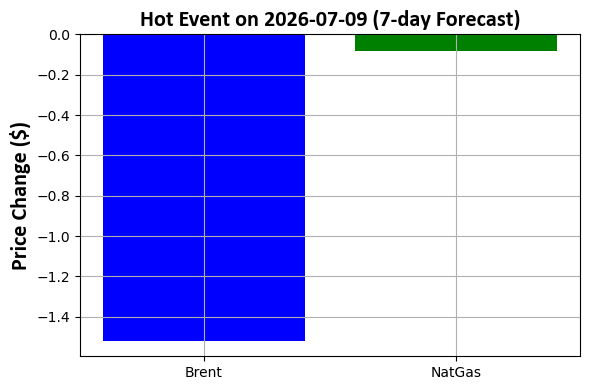

Hot Event on 2026-07-09
  Brent start=57.56, forecast=56.04, return=-0.019
  NatGas start=4.76, forecast=4.68, return=-0.034
--------------------------------------------------


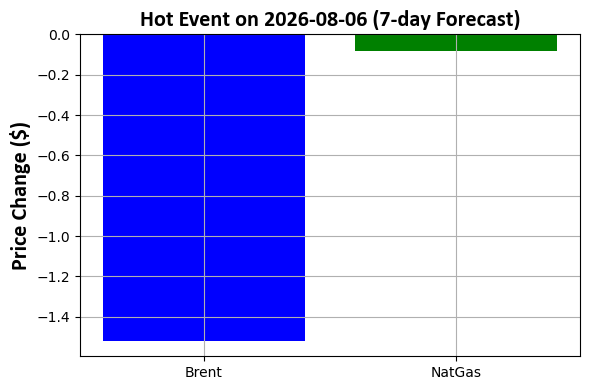

Hot Event on 2026-08-06
  Brent start=56.04, forecast=54.52, return=-0.019
  NatGas start=4.68, forecast=4.60, return=-0.034
--------------------------------------------------


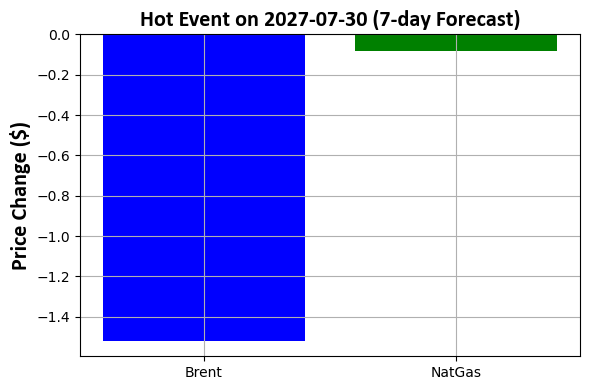

Hot Event on 2027-07-30
  Brent start=74.34, forecast=72.82, return=-0.019
  NatGas start=4.66, forecast=4.58, return=-0.034
--------------------------------------------------


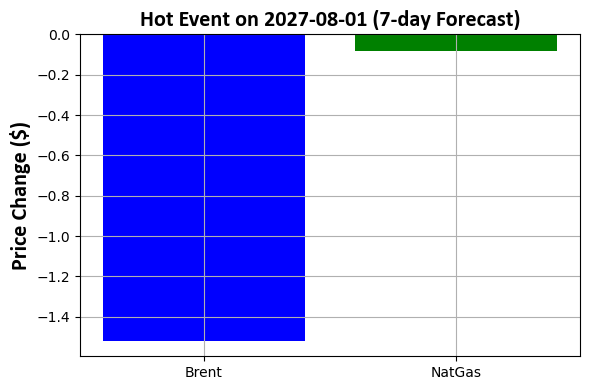

Hot Event on 2027-08-01
  Brent start=72.82, forecast=71.30, return=-0.019
  NatGas start=4.58, forecast=4.49, return=-0.034
--------------------------------------------------


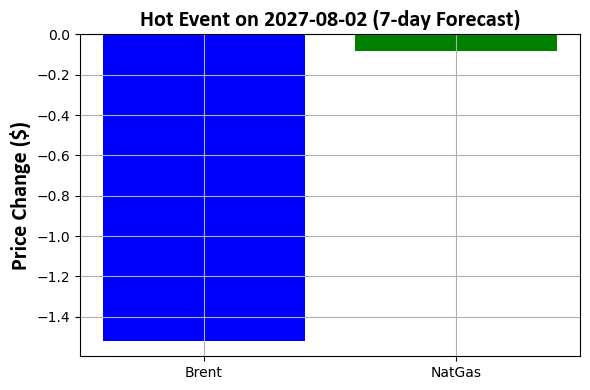

Hot Event on 2027-08-02
  Brent start=71.30, forecast=69.78, return=-0.019
  NatGas start=4.49, forecast=4.41, return=-0.034
--------------------------------------------------


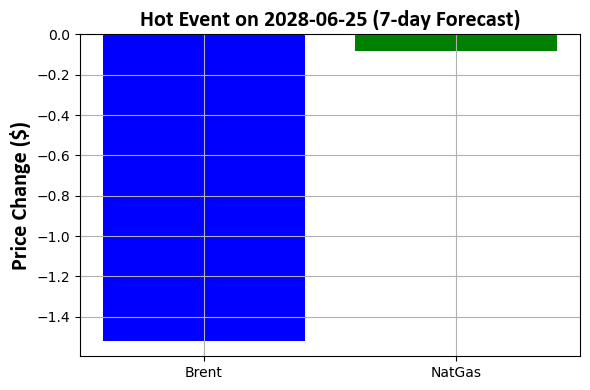

Hot Event on 2028-06-25
  Brent start=80.50, forecast=78.98, return=-0.019
  NatGas start=4.33, forecast=4.25, return=-0.034
--------------------------------------------------


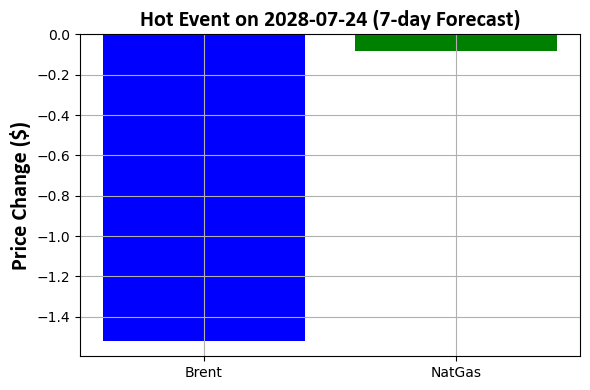

Hot Event on 2028-07-24
  Brent start=78.98, forecast=77.46, return=-0.019
  NatGas start=4.25, forecast=4.17, return=-0.034
--------------------------------------------------


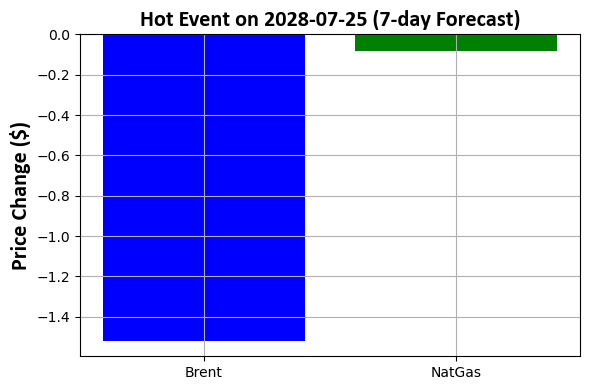

Hot Event on 2028-07-25
  Brent start=77.46, forecast=75.94, return=-0.019
  NatGas start=4.17, forecast=4.09, return=-0.034
--------------------------------------------------


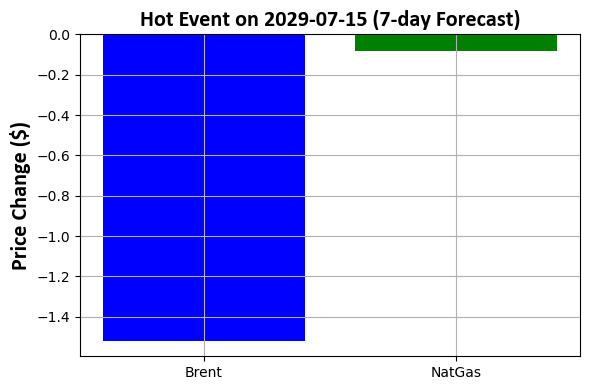

Hot Event on 2029-07-15
  Brent start=74.32, forecast=72.80, return=-0.019
  NatGas start=4.31, forecast=4.23, return=-0.034
--------------------------------------------------


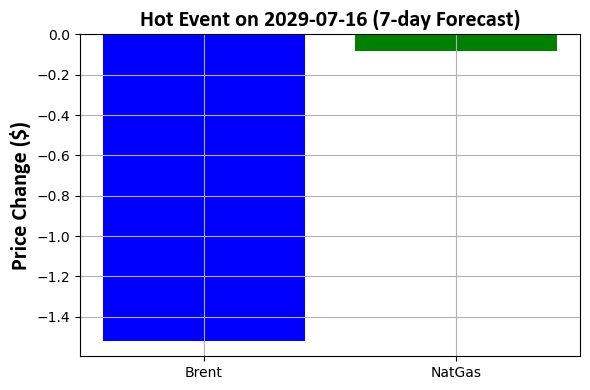

Hot Event on 2029-07-16
  Brent start=72.80, forecast=71.28, return=-0.019
  NatGas start=4.23, forecast=4.15, return=-0.034
--------------------------------------------------


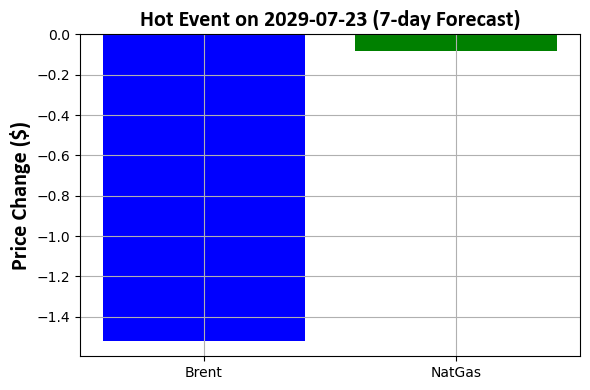

Hot Event on 2029-07-23
  Brent start=71.28, forecast=69.76, return=-0.019
  NatGas start=4.15, forecast=4.07, return=-0.034
--------------------------------------------------


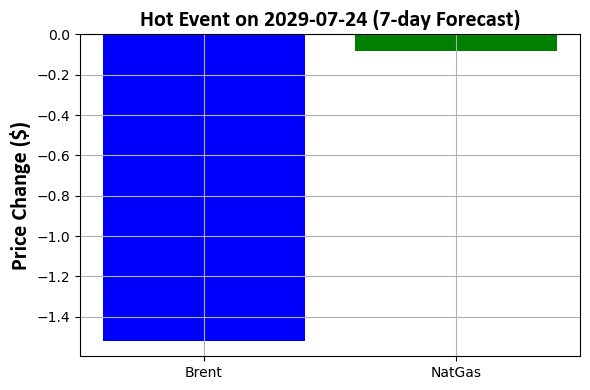

Hot Event on 2029-07-24
  Brent start=69.76, forecast=68.24, return=-0.019
  NatGas start=4.07, forecast=3.99, return=-0.034
--------------------------------------------------


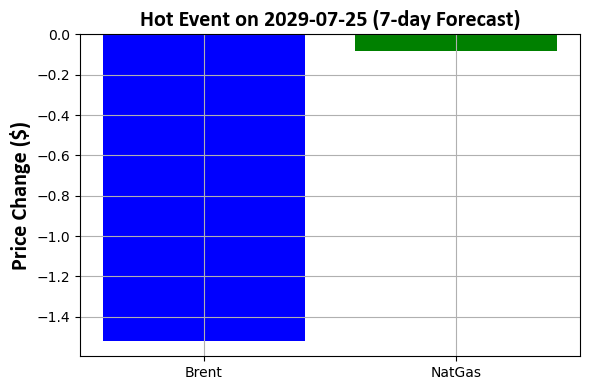

Hot Event on 2029-07-25
  Brent start=68.24, forecast=66.72, return=-0.019
  NatGas start=3.99, forecast=3.91, return=-0.034
--------------------------------------------------


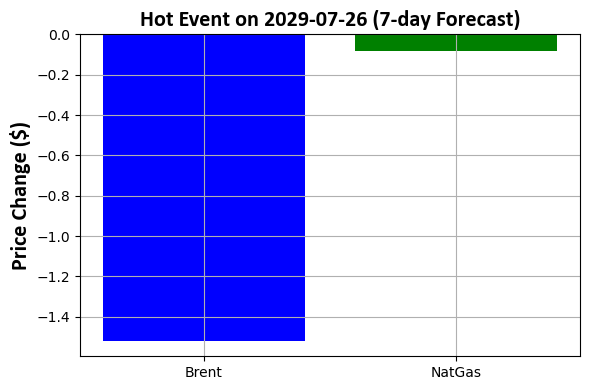

Hot Event on 2029-07-26
  Brent start=66.72, forecast=65.20, return=-0.019
  NatGas start=3.91, forecast=3.83, return=-0.034
--------------------------------------------------


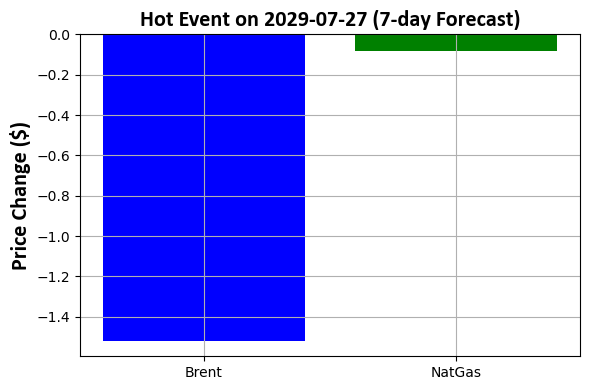

Hot Event on 2029-07-27
  Brent start=65.20, forecast=63.68, return=-0.019
  NatGas start=3.83, forecast=3.75, return=-0.034
--------------------------------------------------


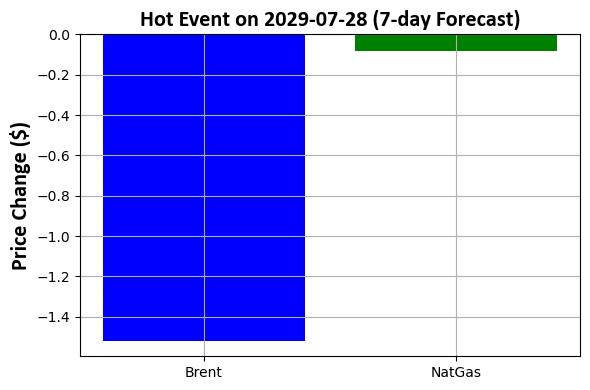

Hot Event on 2029-07-28
  Brent start=63.68, forecast=62.16, return=-0.019
  NatGas start=3.75, forecast=3.67, return=-0.034
--------------------------------------------------


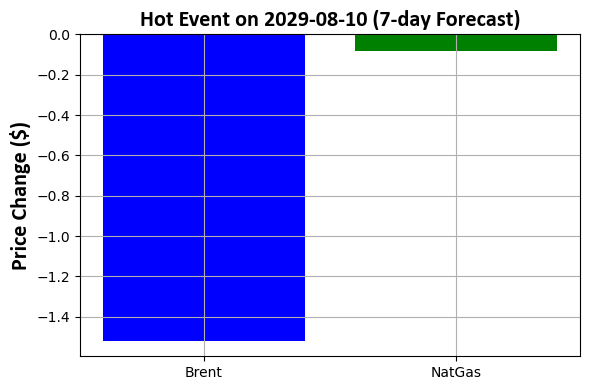

Hot Event on 2029-08-10
  Brent start=62.16, forecast=60.64, return=-0.019
  NatGas start=3.67, forecast=3.59, return=-0.034
--------------------------------------------------


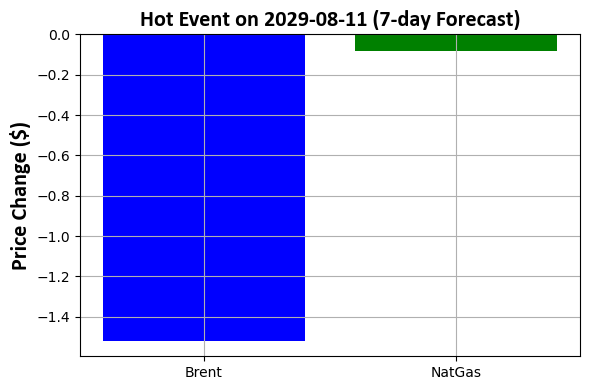

Hot Event on 2029-08-11
  Brent start=60.64, forecast=59.12, return=-0.019
  NatGas start=3.59, forecast=3.50, return=-0.034
--------------------------------------------------


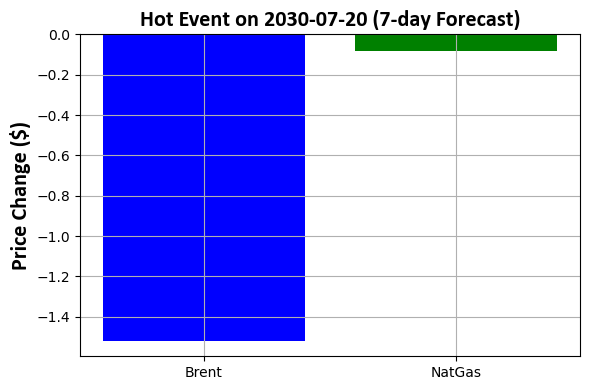

Hot Event on 2030-07-20
  Brent start=59.12, forecast=57.60, return=-0.019
  NatGas start=3.50, forecast=3.42, return=-0.034
--------------------------------------------------


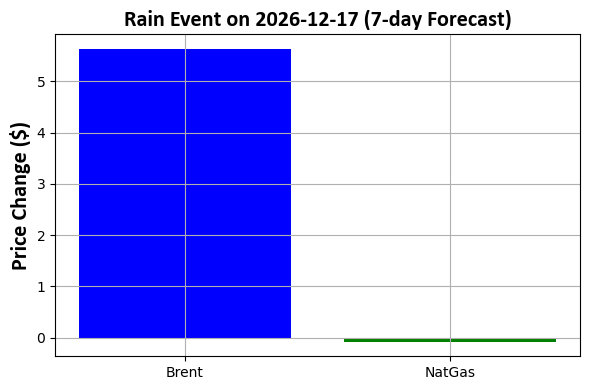

Rain Event on 2026-12-17
  Brent start=61.67, forecast=67.30, return=0.071
  NatGas start=4.60, forecast=4.52, return=-0.021
--------------------------------------------------


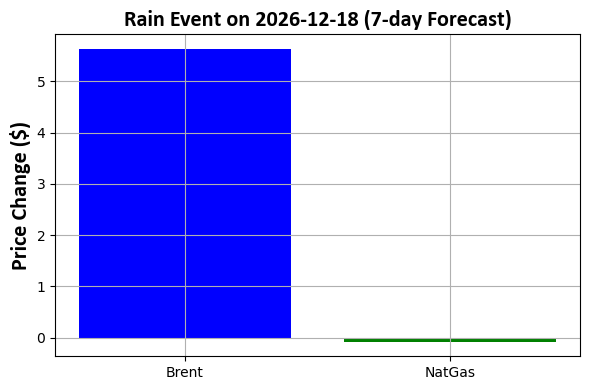

Rain Event on 2026-12-18
  Brent start=67.30, forecast=72.93, return=0.071
  NatGas start=4.52, forecast=4.44, return=-0.021
--------------------------------------------------


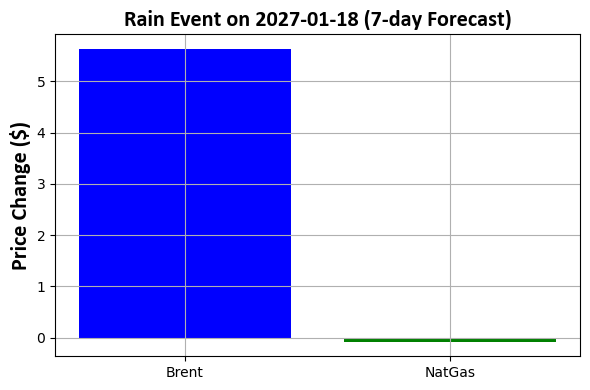

Rain Event on 2027-01-18
  Brent start=70.77, forecast=76.40, return=0.071
  NatGas start=4.74, forecast=4.66, return=-0.021
--------------------------------------------------


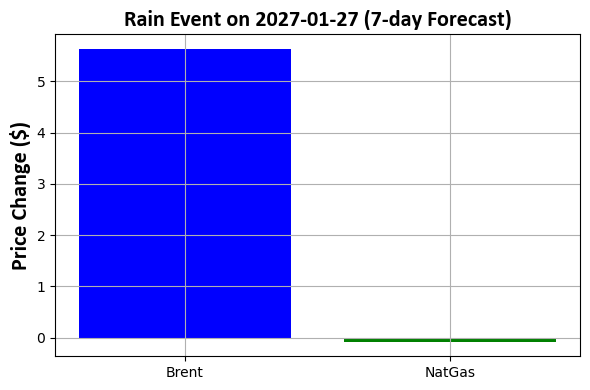

Rain Event on 2027-01-27
  Brent start=75.86, forecast=81.49, return=0.071
  NatGas start=4.74, forecast=4.66, return=-0.021
--------------------------------------------------


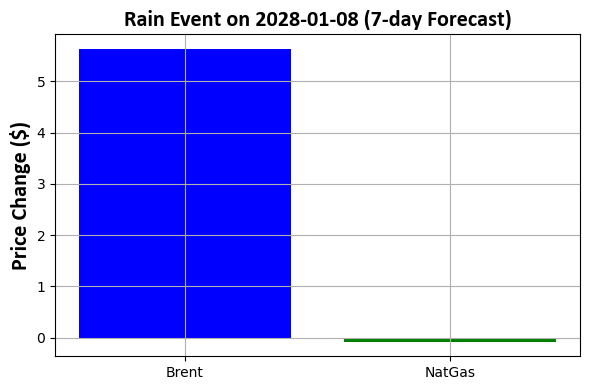

Rain Event on 2028-01-08
  Brent start=76.93, forecast=82.56, return=0.071
  NatGas start=4.41, forecast=4.33, return=-0.021
--------------------------------------------------


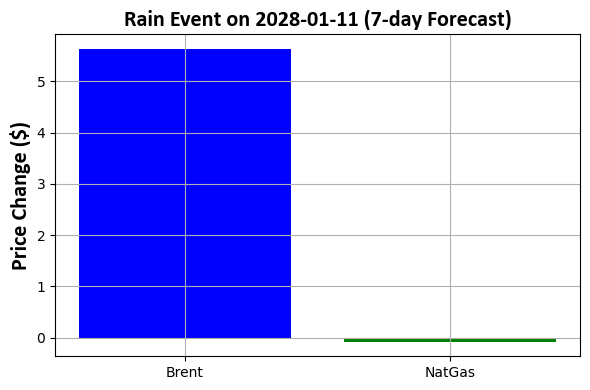

Rain Event on 2028-01-11
  Brent start=82.02, forecast=87.65, return=0.071
  NatGas start=4.41, forecast=4.33, return=-0.021
--------------------------------------------------


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load current baseline prices from your CSVs ===
brent = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\brent_daily.csv")
natgas = pd.read_csv(r"C:\myfiles\Bootcamp\finalproject\natgas_daily.csv")

# Fix header issue: first column is blank -> rename to "Date"
brent.rename(columns={brent.columns[0]: "Date"}, inplace=True)
natgas.rename(columns={natgas.columns[0]: "Date"}, inplace=True)

brent["Date"] = pd.to_datetime(brent["Date"])
natgas["Date"] = pd.to_datetime(natgas["Date"])

brent_last_price = brent["brent"].iloc[-1]
natgas_last_price = natgas["natgas"].iloc[-1]

# === Future climate event dates ===
rain_dates = pd.to_datetime([
    "2026-12-17","2026-12-18","2027-01-18","2027-01-27",
    "2028-01-08","2028-01-11"
])
hot_dates = pd.to_datetime([
    "2026-07-07","2026-07-08","2026-07-09","2026-08-06",
    "2027-07-30","2027-08-01","2027-08-02",
    "2028-06-25","2028-07-24","2028-07-25",
    "2029-07-15","2029-07-16","2029-07-23","2029-07-24",
    "2029-07-25","2029-07-26","2029-07-27","2029-07-28",
    "2029-08-10","2029-08-11","2030-07-20"
])
cold_dates = pd.to_datetime([
    "2025-12-27","2025-12-28","2026-12-20","2026-12-21","2026-12-22",
    "2027-01-12","2027-01-22","2028-01-10",
    "2029-01-11","2029-01-12","2029-01-13"
])

# === Event impact coefficients (7-day price change) ===
brent_impacts = {"Rain": 5.63, "Hot": -1.52, "Cold": -0.54}
natgas_impacts = {"Rain": -0.080, "Hot": -0.081, "Cold": 0.076}


# === 7-day impact coefficients ===
brent_ret_coef = {"Rain": 0.071, "Hot": -0.019, "Cold": -0.020}
brent_price_coef = {"Rain": 5.63, "Hot": -1.52, "Cold": -0.54}
natgas_ret_coef = {"Rain": -0.021, "Hot": -0.034, "Cold": -0.001}
natgas_price_coef = {"Rain": -0.080, "Hot": -0.081, "Cold": 0.076}

# === Build event timeline ===
events = []
for d in rain_dates:
    events.append({"Date": d, "Type": "Rain"})
for d in hot_dates:
    events.append({"Date": d, "Type": "Hot"})
for d in cold_dates:
    events.append({"Date": d, "Type": "Cold"})

events_df = pd.DataFrame(events).sort_values("Date").reset_index(drop=True)

# === Simulate sequential prices ===
brent_price = brent_last_price
natgas_price = natgas_last_price
brent_prices, natgas_prices = [], []

for _, row in events_df.iterrows():
    event_type = row["Type"]
    brent_price += brent_impacts[event_type]
    natgas_price += natgas_impacts[event_type]
    brent_prices.append(brent_price)
    natgas_prices.append(natgas_price)

events_df["Brent_Price"] = brent_prices
events_df["NatGas_Price"] = natgas_prices

# === Split by category ===
cold_events = events_df[events_df["Type"]=="Cold"]
hot_events = events_df[events_df["Type"]=="Hot"]
rain_events = events_df[events_df["Type"]=="Rain"]

# === Function to plot forecasts for a category ===
def plot_category(events_subset, category):
    for i, row in events_subset.iterrows():
        event_type = row["Type"]
        date = row["Date"]
        brent_start = row["Brent_Price"]
        natgas_start = row["NatGas_Price"]

        # Forecast changes
        brent_ret = brent_ret_coef[event_type]
        brent_change = brent_price_coef[event_type]
        natgas_ret = natgas_ret_coef[event_type]
        natgas_change = natgas_price_coef[event_type]

        brent_forecast = brent_start + brent_change
        natgas_forecast = natgas_start + natgas_change

        # Bar chart
        fig, ax = plt.subplots(figsize=(6,4))
        ax.bar(["Brent","NatGas"], [brent_change, natgas_change],
               color=["blue","green"])
        ax.set_title(f"{category} Event on {date.date()} (7-day Forecast)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
        ax.set_ylabel("Price Change ($)",fontdict={'family':'Calibri','size':16,'weight':'bold'})
        
        plt.tight_layout()
        plt.grid(True)
        plt.show()

        # Print forecasted values
        print(f"{category} Event on {date.date()}")
        print(f"  Brent start={brent_start:.2f}, forecast={brent_forecast:.2f}, return={brent_ret:.3f}")
        print(f"  NatGas start={natgas_start:.2f}, forecast={natgas_forecast:.2f}, return={natgas_ret:.3f}")
        print("-"*50)

# === Generate categorized plots ===
plot_category(cold_events, "Cold")
plot_category(hot_events, "Hot")
plot_category(rain_events, "Rain")